## Brief
The overall goal of this project is to help the CMs focus on areas that will foster economic development for their respective states. Since the most common measure of economic development is the GDP, we will analyse the GDP of the various states of India and suggest ways to improve it.

### Understanding GDP
**Gross domestic product (GDP)** at current prices is the GDP at the market value of goods and services produced in a country during a year. In other words, GDP measures the 'monetary value of final goods and services produced by a country/state in a given period of time'.

### Percapita GDP and Income
Total GDP divided by the population gives the **per capita GDP**, which roughly measures the average value of goods and services produced per person. The **per capita income** is closely related to the per **capita GDP** (though they are not the same). 

India ranks 11th in the world in terms of total GDP; however, it lies at the 139th position in terms of per capita GDP.


## Problem Description
The data for GDP analysis of the Indian states is divided into two parts:

    1.Data I-A: This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.
    2.Data I-B: This dataset contains the distribution of GSDP among three sectors: the primary sector (agriculture), the secondary sector (industry) and the tertiary sector (services) along with taxes and subsidies. There is separate dataset for each of the states. We are expected to read the dataset for the available states and join these (in Python) if needed.

In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline


sns.set(style="ticks", color_codes=True)
sns.set_style('whitegrid')

### Part-I: GDP Analysis of the Indian States
#### Part I-A:
1. Import the Dataset Data I-A

In [2]:
#Import the Data Set
df_gsdp_st_ut = pd.read_csv('Data_I-A.csv')
df_gsdp_st_ut.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
#Analyze the Data types of the Columns and the number of Data and column names
print(df_gsdp_st_ut.info())
print("Dimension of the Dataset {0}".format(df_gsdp_st_ut.shape))
print("Columns of the Dataset are:")
print(*df_gsdp_st_ut.columns.values, sep = ",")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [4]:
#To check whether any null values are there or not
## Across Columns
df_gsdp_st_ut.isna().any()

Items  Description           False
Duration                     False
Andhra Pradesh               False
Arunachal Pradesh             True
Assam                         True
Bihar                         True
Chhattisgarh                 False
Goa                           True
Gujarat                       True
Haryana                      False
Himachal Pradesh              True
Jammu & Kashmir               True
Jharkhand                     True
Karnataka                     True
Kerala                        True
Madhya Pradesh               False
Maharashtra                   True
Manipur                       True
Meghalaya                    False
Mizoram                       True
Nagaland                      True
Odisha                       False
Punjab                        True
Rajasthan                     True
Sikkim                        True
Tamil Nadu                   False
Telangana                    False
Tripura                       True
Uttar Pradesh       

In [5]:
# We saw there are quite a few, let's get the count
df_gsdp_st_ut.isna().sum().sort_values(ascending = False)

West Bengal1                 11
Manipur                       4
Tripura                       4
Maharashtra                   4
Mizoram                       4
Nagaland                      4
Rajasthan                     4
Punjab                        4
Himachal Pradesh              4
Andaman & Nicobar Islands     4
Chandigarh                    2
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Goa                           2
Uttar Pradesh                 2
Assam                         2
Gujarat                       2
Uttarakhand                   2
Sikkim                        2
Arunachal Pradesh             2
Bihar                         2
Andhra Pradesh                0
Chhattisgarh                  0
Duration                      0
All_India GDP                 0
Haryana                       0
Madhya Pradesh                0
Puducherry                    0
Meghalaya                     0
Odisha  

In [6]:
#Checking the percentage of NaN values per column
round(100*(df_gsdp_st_ut.isnull().sum()/len(df_gsdp_st_ut.index)), 2)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

In [7]:
# As it can be seen for West Bengal 100% Data is NaN/Null so this column can be dropped as this column won't 
#provide much of a conclusion

# There are missing values for other states as well but let's not handle missing values right now and let's keep 
# the mssing value as it is
df_gsdp_st_ut = df_gsdp_st_ut.drop(['West Bengal1'], axis = 1)
df_gsdp_st_ut.columns.values

array(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry',
       'All_India GDP'], dtype=object)

In [8]:
#Now to check for the duplicated rows
df_gsdp_st_ut.duplicated().sum() == 0 

# As we can see below there is no duplicated rows

True

In [9]:
# To check how many rows with more missing values
df_gsdp_st_ut.isna().sum(axis = 1) 

# Missing values across rows are hapenning for the row where the duration is 2015-16 and 2016-17, anyways we will drop
# the whole row for the year 2015-16 in the below steps

0      0
1      0
2      0
3      0
4      9
5     22
6      0
7      0
8      0
9      9
10    22
dtype: int64

#### Part I-A
2. Remove the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.

In [10]:
# Drop rows for 201-17
df_gsdp_st_ut = df_gsdp_st_ut.drop(df_gsdp_st_ut[df_gsdp_st_ut['Duration'] == "2016-17"].index.to_list(),axis = 0)
df_gsdp_st_ut

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


#### Part I-A
3. Calculate the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'. Compare the calculated values and plot them for the states. Make appropriate transformations, if necessary, to plot the data. Report the average growth rates of the various states:

    - Which states have been growing consistently fast, and which ones have been struggling?

    - Curiosity exercise: What has been the average growth rate of your home state, and how does it compare to the national average over this duration?

In [11]:
# To get the dataset only for the Duration specified above and for the the specified Item Description
df_gsdp_st_ut_sel_data = df_gsdp_st_ut[(df_gsdp_st_ut['Duration'].isin(['2013-14','2014-15','2015-16'])) & \
                                       (df_gsdp_st_ut['Items  Description'] == '(% Growth over previous year)') ]
df_gsdp_st_ut_sel_data

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [12]:
# To check any columns are there where all the columns are Null
no_of_rows = df_gsdp_st_ut_sel_data.shape[0]
print("To check whether there is any record where all the column entry is initial:  {0}". \
      format(((df_gsdp_st_ut_sel_data.isna().sum() == no_of_rows) == True).any()))

To check whether there is any record where all the column entry is initial:  False


In [13]:
# To get the mean of the Growth 
df_plot = pd.DataFrame(df_gsdp_st_ut_sel_data.mean(), columns=['Average Growth'])
df_plot = df_plot.sort_values(by = 'Average Growth')
print(df_plot.shape)
df_plot

(33, 1)


,Average Growth
Goa,6.033333
Meghalaya,6.953333
Odisha,9.836667
Sikkim,10.486667
Jammu & Kashmir,10.900000
Gujarat,11.126667
Punjab,11.185000
All_India GDP,11.203333
Maharashtra,11.260000
Rajasthan,11.320000


In [14]:
# Get the All India GDP is 
all_india_gdp_avg = df_plot.loc['All_India GDP'].values
print(all_india_gdp_avg)

# This is mainly being fetched so as to check the how the performance/ average of other state is compared to other states
# and also removind the all India GDP from the dataset
df_wit_all_ind_plot = df_plot.drop(['All_India GDP'])

[11.20333333]


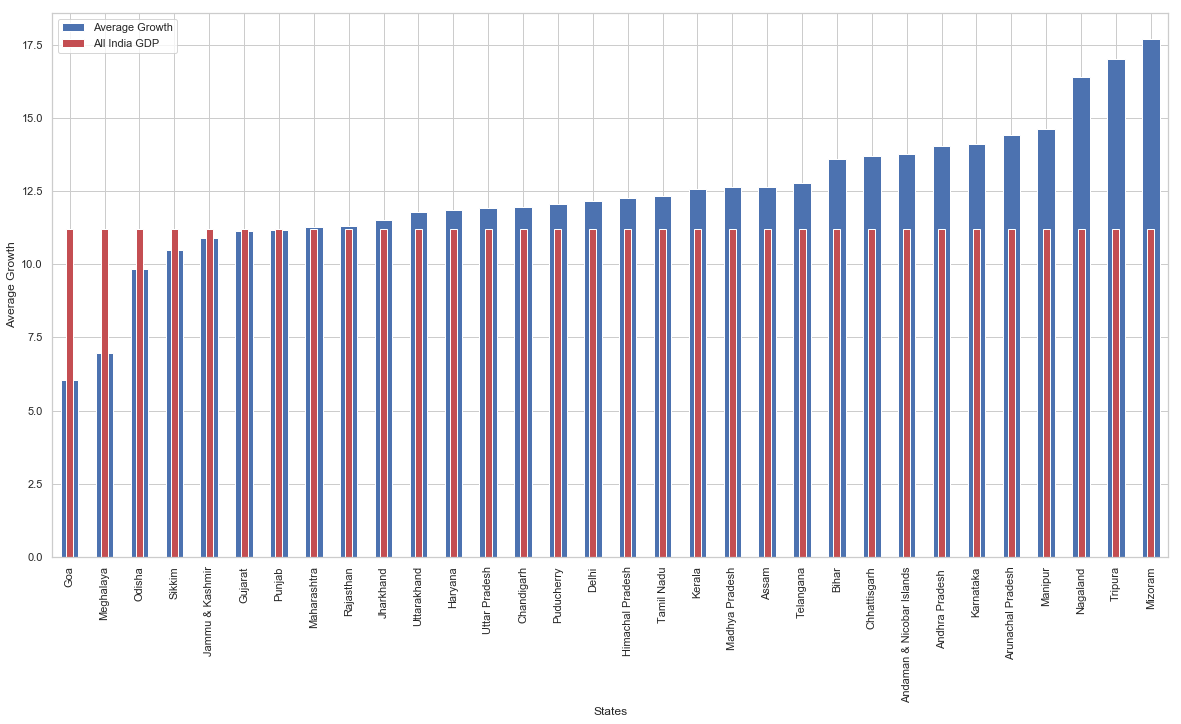

In [95]:
# will plot the State vs Average
y_pos = np.arange(len(df_wit_all_ind_plot))
ax = df_wit_all_ind_plot.plot.bar(figsize = (20,10))
ax.bar(y_pos,all_india_gdp_avg, width=0.2, color='r')
ax.set_xlabel("States")
ax.set_ylabel("Average Growth")
plt.legend(["Average Growth", "All India GDP"])
plt.show()

**Observation from the Above Graph**
1. As we can see from the above graph if we take the top three who has an increasing growth/ growing constanly in the average, the values are **Mizoram, Tripura and Nagaland**. And the below three states which are struggling they are **Goa, Meghalaya and Odisha**.
2. My home state West Bengal is not there, but I would pick one state let's say **Karnataka** and I would do the analysis

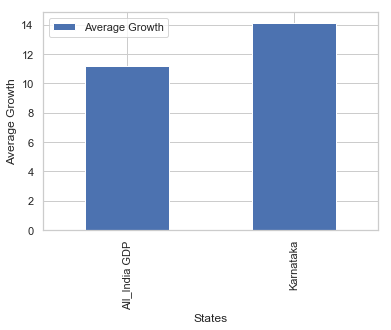

In [16]:
df_plot.loc[['Karnataka', 'All_India GDP']].sort_values(by = 'Average Growth').plot.bar().\
set(xlabel = 'States', ylabel = 'Average Growth')
plt.show()

In [17]:
df_plot.loc[['Karnataka', 'All_India GDP']]

,Average Growth
Karnataka,14.120000
All_India GDP,11.203333


As per the Analysis above, Karnataka has higher Average Growth compared to the All India GDP

#### Part I-A
4. Plot the total GDP of the states for the year 2015-16:
    - Identify the top 5 and the bottom 5 states based on total GDP.

In [18]:
# Get the GSDP Data for 2015-16
df_plot_total_gdp = df_gsdp_st_ut[(df_gsdp_st_ut['Duration'] == '2015-16') & \
                                       (df_gsdp_st_ut['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') ]
df_plot_total_gdp

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [19]:
#Check whether some columns have NaN values 
df_plot_total_gdp.isna().all()

Items  Description           False
Duration                     False
Andhra Pradesh               False
Arunachal Pradesh            False
Assam                        False
Bihar                        False
Chhattisgarh                 False
Goa                          False
Gujarat                      False
Haryana                      False
Himachal Pradesh              True
Jammu & Kashmir              False
Jharkhand                    False
Karnataka                    False
Kerala                       False
Madhya Pradesh               False
Maharashtra                   True
Manipur                       True
Meghalaya                    False
Mizoram                       True
Nagaland                      True
Odisha                       False
Punjab                        True
Rajasthan                     True
Sikkim                       False
Tamil Nadu                   False
Telangana                    False
Tripura                       True
Uttar Pradesh       

In [20]:
#if yes then drop, so as to drop get the columnn indexes
col_idx = np.where(df_plot_total_gdp.isna().all().values == True)[0].tolist()
print(col_idx)
col_list = df_plot_total_gdp.isna().all().index.tolist()
final_list = [ col_list[elem] for elem in col_idx]
print("Columns to Drop::")
print(*final_list, sep = '\n')

[10, 16, 17, 19, 20, 22, 23, 27, 30]
Columns to Drop::
Himachal Pradesh
Maharashtra
Manipur
Mizoram
Nagaland
Punjab
Rajasthan
Tripura
Andaman & Nicobar Islands


In [21]:
#Drop Columns ( compare and show before deletion and after deletion)
print("Before Deletion")
print(df_plot_total_gdp.columns)
df_plot_total_gdp = df_plot_total_gdp.drop(final_list, axis = 1)
print("After Deletion")
print(df_plot_total_gdp.columns)

Before Deletion
Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi',
       'Puducherry', 'All_India GDP'],
      dtype='object')
After Deletion
Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Meghalaya', 'Odisha', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Uttar Pradesh', 'Uttarakhand', 'Chandigarh', 'Delhi',
       'Puducherry', 'All_India GDP'],
   

In [22]:
#Transpose the dataframe
df_plot_total_gdp = df_plot_total_gdp.transpose()
df_plot_total_gdp

,4
Items Description,GSDP - CURRENT PRICES (` in Crore)
Duration,2015-16
Andhra Pradesh,609934
Arunachal Pradesh,18784
Assam,224234
Bihar,413503
Chhattisgarh,260776
Goa,45002
Gujarat,994316
Haryana,485184


In [23]:
#Strip first two rows, and rename of the column
df_plot_total_gdp = df_plot_total_gdp.iloc[2:,:]
df_plot_total_gdp.rename(columns = {4:'Total GDP'}, inplace = True)

C:\Users\I327559\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [24]:
# Sorting values
df_plot_total_gdp = df_plot_total_gdp.sort_values(by = 'Total GDP')
#Dropping All_India GDP as the plot needs to be created for the whole India for all the states
df_plot_total_gdp = df_plot_total_gdp.drop(['All_India GDP'])

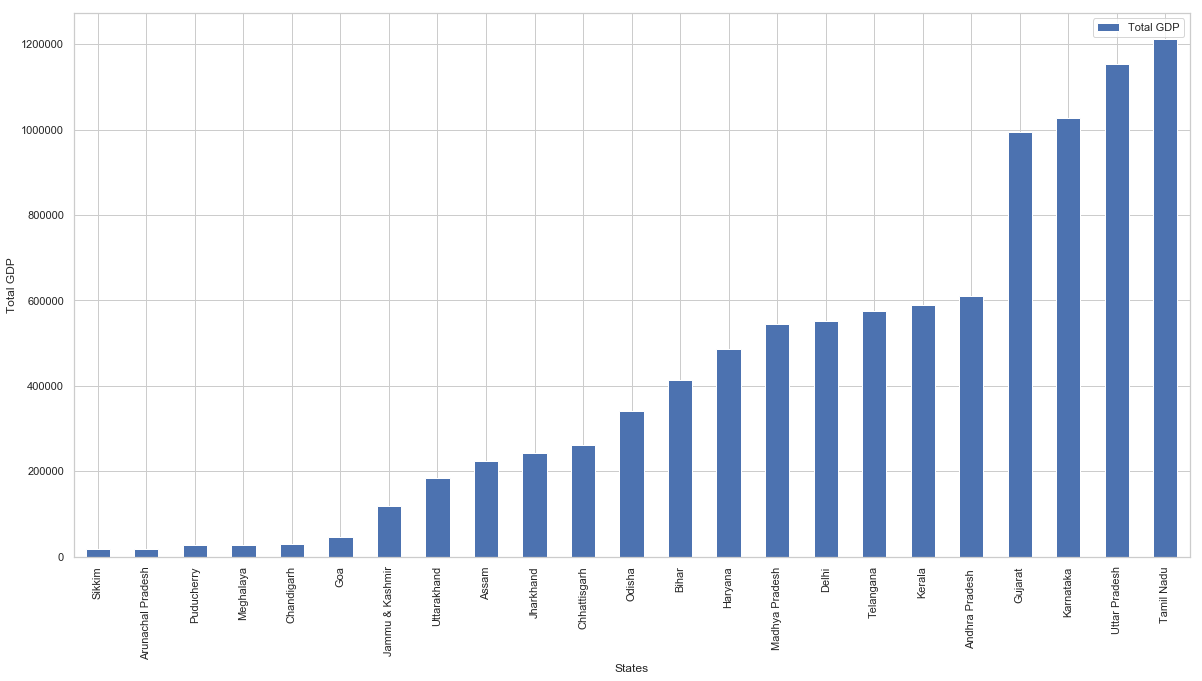

In [25]:
#Plot States VS Total GDP
df_plot_total_gdp.plot.bar(figsize = (20,10)).\
set(xlabel = 'States', ylabel = 'Total GDP')
plt.show()

So from the observation what can be concluded that thet Total GDP for the States for the Fiscal Year 2015-16, 
1. The Top five States are:
    - TamilNadu
    - Uttar Pradesh
    - Karnataka
    - Gujrat
    - Andhra Pradesh
2. The Below five States are:
    - Sikkim
    - Arunachal Pradesh
    - Ponducherry ( is not a state, it's a UT )
    - Meghalaya
    - Chandigarh
    - Goa ( To be considered, if we don't cosider Ponducherry )

=====================================================================================================================

                                   **END OF PART I-A Analysis**
                                   
=====================================================================================================================                        

#### Part I-B:
1. For the analysis below, use Data I-B. You can also use Data I-B along with Data I-A if required. Also, perform the analysis only for the duration 2014-15.


**Merge Files**

In [26]:
#Gets all the files list which matches this pattern
def get_file_name_inside_dir(file_path, file_type):
    return [name for name in os.listdir(file_path) if name.endswith(file_type)] 

In [27]:
#This will be the master dataframe for Part I-B
df_master_data_merge = pd.DataFrame()
path = './Data_I-B'
# Gets the file name
file_names = get_file_name_inside_dir(path, '.csv')
for file in file_names:
    state = file.split("-")[1] # Fetches the state Name
    df = pd.read_csv((path+'/'+file), usecols = [1, 5], names = ['Item',state], skiprows = [0] ) # Read CSV
    if (df_master_data_merge.shape[0] == 0): # In case of the initial merge
        df_master_data_merge = df
    else:
        df_master_data_merge = df_master_data_merge.merge(df, how = 'outer', on = "Item")  
df_master_data_merge # Final Data list

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.00,8015238.0,1514981.0,...,607897.0,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
1,Crops,7893514.0,415520.0,2890544.0,4688237.0,2613371.0,140421.0,9671086.00,4636731.0,853758.0,...,375825.0,4382636.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
2,Livestock,4309078.0,38387.0,173478.0,2060296.0,352208.0,30141.0,2698910.00,2916173.0,110304.0,...,123800.0,788243.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
3,Forestry and logging,346160.0,224017.0,261987.0,550132.0,597785.0,15744.0,761616.00,352254.0,540950.0,...,99802.0,791463.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
4,Fishing and aquaculture,2270664.0,8193.0,529539.0,653224.0,385483.0,122201.0,638357.00,110080.0,9968.0,...,8470.0,460636.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0
5,Mining and quarrying,1484300.0,30842.0,1471149.0,68107.0,2451970.0,3622.0,2117218.00,25186.0,33385.0,...,8280.0,2586328.0,10354.0,4069385.0,1329.0,265536.0,1541853.0,142391.0,244549.0,901501.0
6,Primary,16303716.0,716959.0,5326697.0,8019997.0,6400817.0,312129.0,15887187.00,8040424.0,1548366.0,...,616178.0,9009306.0,9296070.0,19113780.0,138776.0,13329774.0,9133354.0,942216.0,1845972.0,25999255.0
7,Manufacturing,4672266.0,26120.0,2002936.0,2189965.0,4370593.0,1177608.0,24087538.00,7756921.0,2543637.0,...,18346.0,5754229.0,4790341.0,6552580.0,550697.0,18914794.0,6353711.0,228625.0,5866252.0,12261649.0
8,"Electricity, gas, water supply & other utility...",1151729.0,113527.0,296587.0,345168.0,1198438.0,204110.0,3409983.00,1101919.0,767268.0,...,37944.0,833067.0,911611.0,1122888.0,212499.0,1710379.0,716266.0,77870.0,433880.0,2030625.0
9,Construction,4664889.0,147842.0,1733568.0,3449763.0,2669855.0,165819.0,5526017.00,3702571.0,808256.0,...,156072.0,2402396.0,2202962.0,5353326.0,82058.0,12216718.0,2854024.0,177899.0,1342733.0,11256450.0


In [28]:
df_master_data_merge.columns

Index(['Item', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura',
       'Uttarakhand', 'Uttar_Pradesh'],
      dtype='object')

In [29]:
# As we can see in the above Table there are few rows more which are ending with *, these are mainly coming 
# as there are some rows special characters, we need to remove them
df_problem = df_master_data_merge.iloc[np.char.find(df_master_data_merge['Item'].unique().tolist(), '*') > 0]
df_problem

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
33,Services incidental to transport*,NaN,NaN,NaN,NaN,NaN,NaN,2744163.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,864407.0,NaN,88721.0,NaN,NaN
34,Trade & repair services*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Road transport**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Road transport*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307147.0,NaN


In [30]:
#There are few extra * in the Item (as we can see in the above dataset o/p) that needs to be dropped
df_master_data_merge = df_master_data_merge.drop(df_problem.index.tolist())
df_master_data_merge

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.00,8015238.0,1514981.0,...,607897.0,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
1,Crops,7893514.0,415520.0,2890544.0,4688237.0,2613371.0,140421.0,9671086.00,4636731.0,853758.0,...,375825.0,4382636.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
2,Livestock,4309078.0,38387.0,173478.0,2060296.0,352208.0,30141.0,2698910.00,2916173.0,110304.0,...,123800.0,788243.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
3,Forestry and logging,346160.0,224017.0,261987.0,550132.0,597785.0,15744.0,761616.00,352254.0,540950.0,...,99802.0,791463.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
4,Fishing and aquaculture,2270664.0,8193.0,529539.0,653224.0,385483.0,122201.0,638357.00,110080.0,9968.0,...,8470.0,460636.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0
5,Mining and quarrying,1484300.0,30842.0,1471149.0,68107.0,2451970.0,3622.0,2117218.00,25186.0,33385.0,...,8280.0,2586328.0,10354.0,4069385.0,1329.0,265536.0,1541853.0,142391.0,244549.0,901501.0
6,Primary,16303716.0,716959.0,5326697.0,8019997.0,6400817.0,312129.0,15887187.00,8040424.0,1548366.0,...,616178.0,9009306.0,9296070.0,19113780.0,138776.0,13329774.0,9133354.0,942216.0,1845972.0,25999255.0
7,Manufacturing,4672266.0,26120.0,2002936.0,2189965.0,4370593.0,1177608.0,24087538.00,7756921.0,2543637.0,...,18346.0,5754229.0,4790341.0,6552580.0,550697.0,18914794.0,6353711.0,228625.0,5866252.0,12261649.0
8,"Electricity, gas, water supply & other utility...",1151729.0,113527.0,296587.0,345168.0,1198438.0,204110.0,3409983.00,1101919.0,767268.0,...,37944.0,833067.0,911611.0,1122888.0,212499.0,1710379.0,716266.0,77870.0,433880.0,2030625.0
9,Construction,4664889.0,147842.0,1733568.0,3449763.0,2669855.0,165819.0,5526017.00,3702571.0,808256.0,...,156072.0,2402396.0,2202962.0,5353326.0,82058.0,12216718.0,2854024.0,177899.0,1342733.0,11256450.0


In [31]:
# This is to drop all the column which has NaN values, so as to find which values needs to be feed into the column
df_problem = df_problem.iloc[:,(~df_problem.isna().all()).values.tolist()]
df_problem

,Item,Gujarat,Kerala,Tamil_Nadu,Tripura,Uttarakhand
33,Services incidental to transport*,2744163.0,NaN,864407.0,88721.0,NaN
34,Trade & repair services*,NaN,7763847.0,NaN,NaN,NaN
35,Road transport**,NaN,2761427.0,NaN,NaN,NaN
36,Road transport*,NaN,NaN,NaN,NaN,307147.0


In [32]:
# This is to replace the *
df_problem['Item'] = df_problem['Item'].str.replace('*','')
df_problem

C:\Users\I327559\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Item,Gujarat,Kerala,Tamil_Nadu,Tripura,Uttarakhand
33,Services incidental to transport,2744163.0,NaN,864407.0,88721.0,NaN
34,Trade & repair services,NaN,7763847.0,NaN,NaN,NaN
35,Road transport,NaN,2761427.0,NaN,NaN,NaN
36,Road transport,NaN,NaN,NaN,NaN,307147.0


Then there is a need to adjust all the data as in the parent data set all the above rows are NaN, let's replace all the NaN with the actual values

In [33]:
temp_data = df_master_data_merge[df_master_data_merge['Item'] == 'Services incidental to transport'].transpose()
temp_data.loc['Gujarat'] = 2744163.0
temp_data.loc['Tamil_Nadu'] = 864407.0
temp_data.loc['Tripura'] = 88721.0
df_master_data_merge[df_master_data_merge['Item'] == 'Services incidental to transport'] = temp_data.transpose()

In [34]:
temp_data = df_master_data_merge[df_master_data_merge['Item'] == 'Trade & repair services'].transpose()
temp_data.loc['Kerala'] = 7763847.0
df_master_data_merge[df_master_data_merge['Item'] == 'Trade & repair services'] = temp_data.transpose()

In [35]:
temp_data = df_master_data_merge[df_master_data_merge['Item'] == 'Road transport'].transpose()
temp_data.loc['Kerala'] = 2761427.0
temp_data.loc['Uttarakhand'] = 307147.0
df_master_data_merge[df_master_data_merge['Item'] == 'Road transport'] = temp_data.transpose()

In [36]:
df_master_data_merge # Final Data

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,"Agriculture, forestry and fishing",1.48194e+07,686117,3.85555e+06,7.95189e+06,3.94885e+06,308507,1.377e+07,8.01524e+06,1.51498e+06,...,607897,6.42298e+06,9.28572e+06,1.50444e+07,137447,1.30642e+07,7.5915e+06,799825,1.60142e+06,2.50978e+07
1,Crops,7.89351e+06,415520,2.89054e+06,4.68824e+06,2.61337e+06,140421,9.67109e+06,4.63673e+06,853758,...,375825,4.38264e+06,5.69097e+06,7.67344e+06,114976,7.29782e+06,4.16249e+06,397591,866146,1.62152e+07
2,Livestock,4.30908e+06,38387,173478,2.0603e+06,352208,30141,2.69891e+06,2.91617e+06,110304,...,123800,788243,2.63884e+06,5.35626e+06,17338,4.69336e+06,2.9513e+06,88176,391188,7.09688e+06
3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616,352254,540950,...,99802,791463,848245,1.95666e+06,4529,392705,210741,145096,339293,1.40494e+06
4,Fishing and aquaculture,2.27066e+06,8193,529539,653224,385483,122201,638357,110080,9968,...,8470,460636,107657,58036,604,680352,266968,168961,4796,380730
5,Mining and quarrying,1.4843e+06,30842,1.47115e+06,68107,2.45197e+06,3622,2.11722e+06,25186,33385,...,8280,2.58633e+06,10354,4.06938e+06,1329,265536,1.54185e+06,142391,244549,901501
6,Primary,1.63037e+07,716959,5.3267e+06,8.02e+06,6.40082e+06,312129,1.58872e+07,8.04042e+06,1.54837e+06,...,616178,9.00931e+06,9.29607e+06,1.91138e+07,138776,1.33298e+07,9.13335e+06,942216,1.84597e+06,2.59993e+07
7,Manufacturing,4.67227e+06,26120,2.00294e+06,2.18996e+06,4.37059e+06,1.17761e+06,2.40875e+07,7.75692e+06,2.54364e+06,...,18346,5.75423e+06,4.79034e+06,6.55258e+06,550697,1.89148e+07,6.35371e+06,228625,5.86625e+06,1.22616e+07
8,"Electricity, gas, water supply & other utility...",1.15173e+06,113527,296587,345168,1.19844e+06,204110,3.40998e+06,1.10192e+06,767268,...,37944,833067,911611,1.12289e+06,212499,1.71038e+06,716266,77870,433880,2.03062e+06
9,Construction,4.66489e+06,147842,1.73357e+06,3.44976e+06,2.66986e+06,165819,5.52602e+06,3.70257e+06,808256,...,156072,2.4024e+06,2.20296e+06,5.35333e+06,82058,1.22167e+07,2.85402e+06,177899,1.34273e+06,1.12564e+07


In [37]:
# Missing Value Calculation and Analysis of Data Set
print(df_master_data_merge.info())
print("Dimension of the Dataset {0}".format(df_master_data_merge.shape))
print("Columns of the Dataset are:")
print(df_master_data_merge.columns, sep = ",")

# As we can see some stats below like all the elements data type are Object
# The dimension is 33 * 29
# As we can see below there are few columns for which Null/NaN values are present, let's check the stats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 29 columns):
Item                 33 non-null object
Andhra_Pradesh       33 non-null object
Arunachal_Pradesh    33 non-null object
Assam                33 non-null object
Bihar                33 non-null object
Chhattisgarh         33 non-null object
Goa                  33 non-null object
Gujarat              29 non-null object
Haryana              31 non-null object
Himachal_Pradesh     33 non-null object
Jammu_Kashmir        33 non-null object
Jharkhand            33 non-null object
Karnataka            33 non-null object
Kerala               33 non-null object
Madhya_Pradesh       33 non-null object
Maharashtra          33 non-null object
Manipur              30 non-null object
Meghalaya            31 non-null object
Mizoram              33 non-null object
Nagaland             33 non-null object
Odisha               33 non-null object
Punjab               33 non-null object
Rajasthan        

In [38]:
# Identification of Null Values across Rows and Columns
df_master_data_merge.isna().any()

Item                 False
Andhra_Pradesh       False
Arunachal_Pradesh    False
Assam                False
Bihar                False
Chhattisgarh         False
Goa                  False
Gujarat               True
Haryana               True
Himachal_Pradesh     False
Jammu_Kashmir        False
Jharkhand            False
Karnataka            False
Kerala               False
Madhya_Pradesh       False
Maharashtra          False
Manipur               True
Meghalaya             True
Mizoram              False
Nagaland             False
Odisha               False
Punjab               False
Rajasthan            False
Sikkim               False
Tamil_Nadu           False
Telangana            False
Tripura               True
Uttarakhand           True
Uttar_Pradesh        False
dtype: bool

In [39]:
# There are null values across columns let's get the count
df_master_data_merge.isna().sum().sort_values(ascending = False)

Tripura              4
Gujarat              4
Manipur              3
Haryana              2
Meghalaya            2
Uttarakhand          1
Uttar_Pradesh        0
Jharkhand            0
Andhra_Pradesh       0
Arunachal_Pradesh    0
Assam                0
Bihar                0
Chhattisgarh         0
Goa                  0
Himachal_Pradesh     0
Jammu_Kashmir        0
Madhya_Pradesh       0
Karnataka            0
Kerala               0
Maharashtra          0
Mizoram              0
Nagaland             0
Odisha               0
Punjab               0
Rajasthan            0
Sikkim               0
Tamil_Nadu           0
Telangana            0
Item                 0
dtype: int64

In [40]:
# Let's try to find the missing values percentage
round(100*(df_master_data_merge.isnull().sum()/len(df_master_data_merge.index)), 2).sort_values(ascending = False)

# So there are only 5 columns where the missing values exists we will try to dond out why is it so

Tripura              12.12
Gujarat              12.12
Manipur               9.09
Haryana               6.06
Meghalaya             6.06
Uttarakhand           3.03
Uttar_Pradesh         0.00
Jharkhand             0.00
Andhra_Pradesh        0.00
Arunachal_Pradesh     0.00
Assam                 0.00
Bihar                 0.00
Chhattisgarh          0.00
Goa                   0.00
Himachal_Pradesh      0.00
Jammu_Kashmir         0.00
Madhya_Pradesh        0.00
Karnataka             0.00
Kerala                0.00
Maharashtra           0.00
Mizoram               0.00
Nagaland              0.00
Odisha                0.00
Punjab                0.00
Rajasthan             0.00
Sikkim                0.00
Tamil_Nadu            0.00
Telangana             0.00
Item                  0.00
dtype: float64

In [41]:
df_master_data_merge[df_master_data_merge.isnull().sum(axis=1) > 0]

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
5,Mining and quarrying,1.4843e+06,30842,1.47115e+06,68107,2.45197e+06,3622,2.11722e+06,25186,33385,...,8280,2.58633e+06,10354,4.06938e+06,1329,265536,1.54185e+06,142391,244549,901501
13,Hotels & restaurants,517400,3625,110904,366982,121407,37434,NaN,168535,121333,...,6607,262766,218667,354543,5945,1.64325e+06,770479,NaN,209033,961104
16,Road transport,2.816e+06,15467,507668,1.57229e+06,386628,46171,NaN,1.45236e+06,349608,...,34548,973144,928575,2.12121e+06,35283,3.66099e+06,2.05566e+06,NaN,307147,3.64575e+06
17,Water transport,94200,0,4502,2228,0,17820,NaN,NaN,0,...,600,50349,0,0,0,70414,0,NaN,NaN,681
18,Air transport,14900,0,26223,13599,9507,46359,NaN,NaN,3979,...,4153,15354,4473,13469,0,180836,120691,NaN,3889,36582
19,Services incidental to transport,780200,109,35739,166600,5232,19272,2.74416e+06,190269,1724,...,0,117469,48124,47609,0,864407,454909,88721,-76,16323
20,Storage,18700,0,10308,10618,16675,357,57634,14459,129,...,89,22675,76429,16584,0,39834,19805,254,660,171696


In [42]:
df_master_data_merge.isnull().sum(axis=1).sort_values(ascending = False)

17    6
18    3
16    2
13    2
19    1
5     1
20    1
9     0
11    0
10    0
8     0
7     0
6     0
4     0
3     0
2     0
1     0
12    0
32    0
14    0
15    0
31    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
0     0
dtype: int64

There is only one row which has more than 5 missing values and rest all are pretty less, it can be two reason either the record is not being collected or these fields are not valid for this States, hence it's best to keep these datas untouched

#### Part I-B:
2. Filter out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.

In [43]:
#This will be the master dataframe for UT
df_master_data_merge_UT = pd.DataFrame()
path = './Data_I-B_Union_Ter'
# Gets the file name
file_names = get_file_name_inside_dir(path, '.csv')
for file in file_names:
    state = file.split("-")[1] # Fetches the state Name
    df = pd.read_csv((path+'/'+file), usecols = [1, 5], names = ['Item',state], skiprows = [0] ) # Read CSV
    if (df_master_data_merge_UT.shape[0] == 0): # In case of the initial merge
        df_master_data_merge_UT = df
    else:
        df_master_data_merge_UT = df_master_data_merge_UT.merge(df,how = 'outer', on = "Item")
df_master_data_merge_UT # Final Data list

,Item,Chandigarh,Delhi,Puducherry
0,"Agriculture, forestry and fishing",16233,250568,113156
1,Crops,1659,64959,38878
2,Livestock,13992,183770,45358
3,Forestry and logging,388,861,3931
4,Fishing and aquaculture,194,978,24989
5,Mining and quarrying,179,963777,33272
6,Primary,16412,1214345,146428
7,Manufacturing,149631,2749307,618297
8,"Electricity, gas, water supply & other utility...",29741,971255,60624
9,Construction,133321,2048788,316205


#### Part I-B:
3. Plot the GDP per capita for all the states.
    - Identify the top 5 and the bottom 5 states based on the GDP per capita.
    - Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [44]:
# Fetch the Per Capita GDP Value
data_per_capita_gdp = df_master_data_merge[df_master_data_merge['Item'] == 'Per Capita GSDP (Rs.)']
data_per_capita_gdp = data_per_capita_gdp.transpose()
data_per_capita_gdp

,32
Item,Per Capita GSDP (Rs.)
Andhra_Pradesh,104977
Arunachal_Pradesh,112718
Assam,60621
Bihar,33954
Chhattisgarh,86860
Goa,271793
Gujarat,141263
Haryana,164077
Himachal_Pradesh,147330


In [45]:
# There no rows with NaN is there so no need to handle the missing values
# Only the first row we will remove
data_per_capita_gdp = data_per_capita_gdp.iloc[1:,:]
data_per_capita_gdp.rename(columns = {32: 'Per Capita GSDP (Rs.)'}, inplace = True)
data_per_capita_gdp = data_per_capita_gdp.sort_values(by = 'Per Capita GSDP (Rs.)')
data_per_capita_gdp

C:\Users\I327559\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Per Capita GSDP (Rs.)
Bihar,33954
Uttar_Pradesh,49450
Manipur,58442
Assam,60621
Jharkhand,62091
Madhya_Pradesh,62989
Odisha,73979
Jammu_Kashmir,75840
Meghalaya,76228
Tripura,77358


AxesSubplot(0.125,0.125;0.775x0.755)


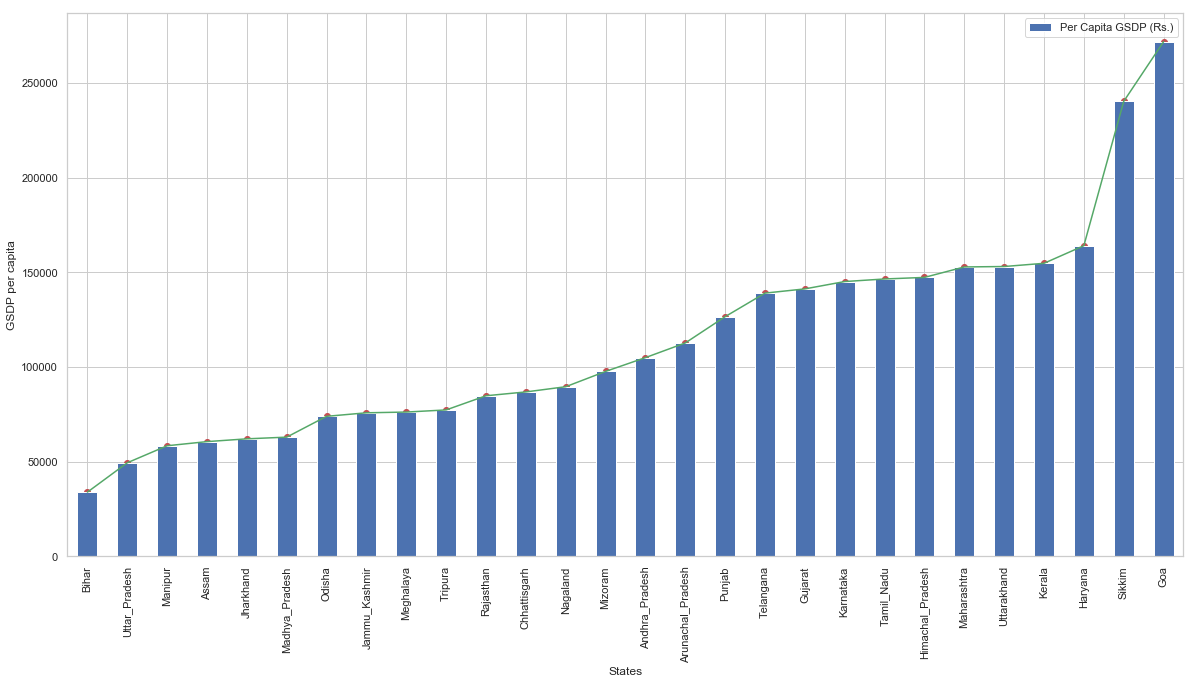

In [46]:
#plot States vs GSDP per capita
ax = data_per_capita_gdp.plot.bar(figsize = (20,10))
ax.scatter(data_per_capita_gdp.index.tolist(), data_per_capita_gdp, c = 'r')
ax.plot(data_per_capita_gdp.index.tolist(), data_per_capita_gdp, c = 'g')
print(ax)
ax.set_xlabel("States")
ax.set_ylabel("GSDP per capita")
plt.show()

Analysis from the graph States Vs Total GDP
   1. Top 5 States are:
       - Goa
       - Sikkim
       - Haryana
       - Kerala
       - Uttarakhand
       - Maharashtra
   2. Bottom 5 state are:
       - Bihar
       - Uttar Pradesh
       - Manipur
       - Assam
       - Jharkhand

In [47]:
# Ratio of the highest Per capita GDP to lowest per capita GDP
data_per_capita_gdp.iloc[-1].values[0] / data_per_capita_gdp.iloc[0].values[0] 

8.004741709371503

#### Part I-B
4. Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [48]:
# To get the respective rows
df_main_sec_stat = df_master_data_merge[df_master_data_merge['Item'].isin(['Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product'])]
df_main_sec_stat.reset_index( inplace = True)
df_main_sec_stat.drop('index', axis = 1, inplace = True) 

C:\Users\I327559\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
# Form the dataframe and then slice the data frame so that it would drop the header rows and then rename the columns
df_main_sec_stat = df_main_sec_stat.transpose()
df_main_sec_stat = df_main_sec_stat.iloc[1:, :]
df_main_sec_stat.rename(columns = {0: 'Primary(%)', 1: 'Secondary(%)', 2: 'Tertiary(%)', 3: 'GSDP' }, inplace = True)
df_main_sec_stat = df_main_sec_stat.sort_values(by = 'GSDP')

In [50]:
df_main_sec_stat.info()
# Let's convert all of them to the float

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Mizoram to Maharashtra
Data columns (total 4 columns):
Primary(%)      28 non-null object
Secondary(%)    28 non-null object
Tertiary(%)     28 non-null object
GSDP            28 non-null object
dtypes: object(4)
memory usage: 1.1+ KB


In [51]:
# Converting to Numeric so that in later stages multiple operation an be performed
df_main_sec_stat = df_main_sec_stat.apply(pd.to_numeric)
df_main_sec_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Mizoram to Maharashtra
Data columns (total 4 columns):
Primary(%)      28 non-null float64
Secondary(%)    28 non-null float64
Tertiary(%)     28 non-null float64
GSDP            28 non-null float64
dtypes: float64(4)
memory usage: 1.1+ KB


In [52]:
# let's check whether there is any missing values are there or not then we have to make sure we have remove them 
df_main_sec_stat.isna().any()
# Then it's a good news

Primary(%)      False
Secondary(%)    False
Tertiary(%)     False
GSDP            False
dtype: bool

In [53]:
# Form the percentage contribution for each of the sector
df_main_sec_stat['Primary(%)'] = (df_main_sec_stat['Primary(%)'] / df_main_sec_stat['GSDP']) * 100 
df_main_sec_stat['Secondary(%)'] = ( df_main_sec_stat['Secondary(%)'] / df_main_sec_stat['GSDP'] ) * 100
df_main_sec_stat['Tertiary(%)'] = ( df_main_sec_stat['Tertiary(%)'] / df_main_sec_stat['GSDP'] ) * 100
df_main_sec_stat

,Primary(%),Secondary(%),Tertiary(%),GSDP
Mizoram,19.516529,23.363984,55.160550,1155933.0
Sikkim,9.124399,55.574637,31.763595,1520933.0
Arunachal_Pradesh,42.774946,17.152064,37.696846,1676119.0
Manipur,21.235110,12.202845,65.252434,1804276.0
Nagaland,33.462038,11.532434,53.923268,1841424.0
Meghalaya,18.479544,26.136520,49.190903,2440807.0
Tripura,31.760140,16.327880,50.046450,2966662.0
Goa,7.681649,38.085628,42.778382,4063307.0
Jammu_Kashmir,16.137988,22.669630,55.906700,10040446.0
Himachal_Pradesh,14.835527,39.467373,39.603084,10436879.0


In [54]:
# So as to convert to rounded off digits for better visuslization
df_main_sec_stat.round(0)
df_main_sec_stat[['Primary(%)', 'Secondary(%)', 'Tertiary(%)']] = df_main_sec_stat[['Primary(%)', 'Secondary(%)', 'Tertiary(%)']].apply(np.int64) 
df_main_sec_stat

,Primary(%),Secondary(%),Tertiary(%),GSDP
Mizoram,19,23,55,1155933.0
Sikkim,9,55,31,1520933.0
Arunachal_Pradesh,42,17,37,1676119.0
Manipur,21,12,65,1804276.0
Nagaland,33,11,53,1841424.0
Meghalaya,18,26,49,2440807.0
Tripura,31,16,50,2966662.0
Goa,7,38,42,4063307.0
Jammu_Kashmir,16,22,55,10040446.0
Himachal_Pradesh,14,39,39,10436879.0


In [55]:
# Drop the GSDP Column as it's not needed for plotting
df_main_sec_stat.drop('GSDP', axis = 1, inplace = True)
df_main_sec_stat.columns

Index(['Primary(%)', 'Secondary(%)', 'Tertiary(%)'], dtype='object')

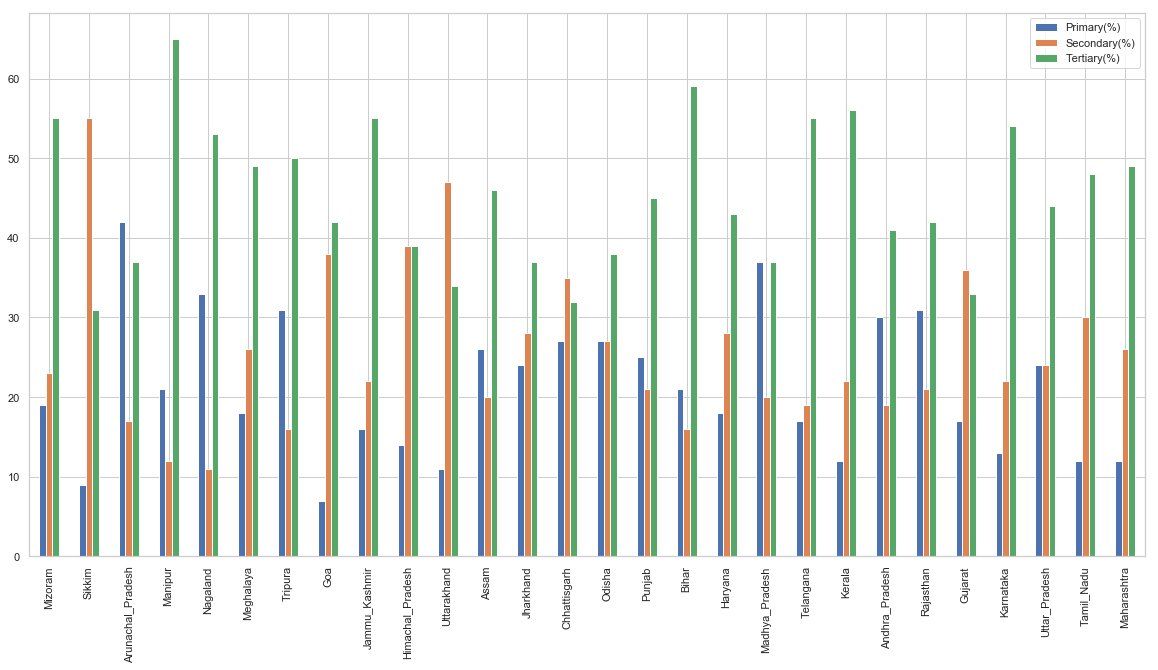

In [56]:
# Categorical Bar Plot
df_main_sec_stat.plot.bar(figsize = (20,10))
plt.show()

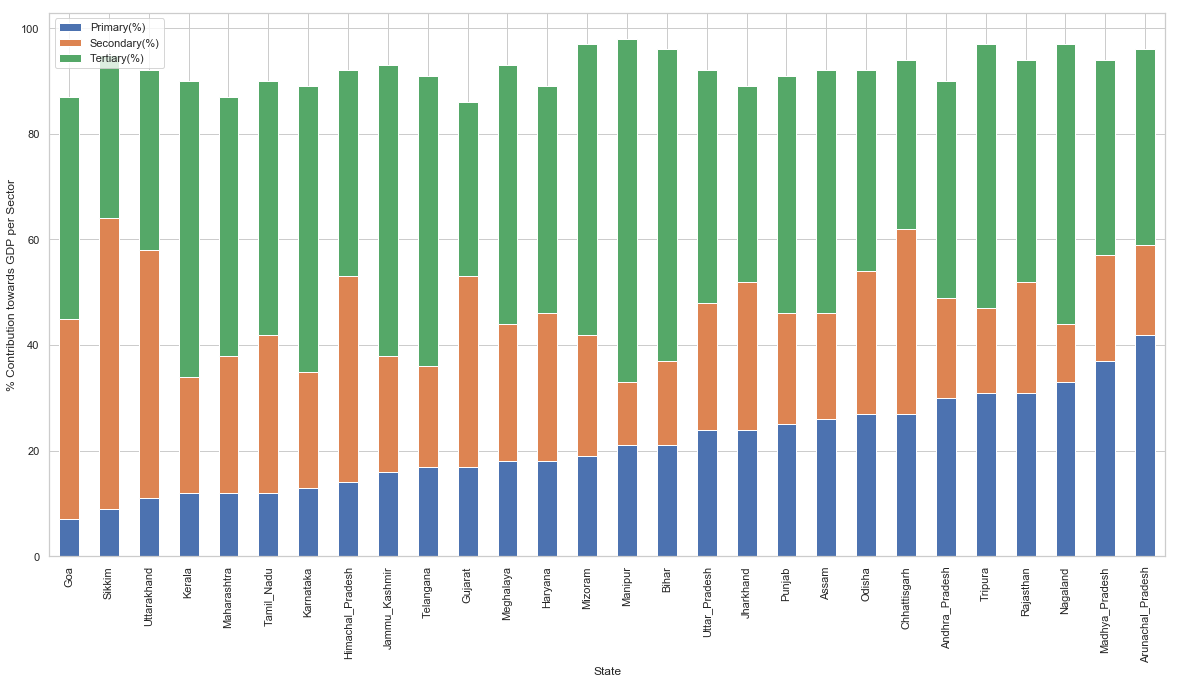

In [57]:
# Stacked Bar plot
df_main_sec_stat.sort_values( by = [ 'Primary(%)', 'Secondary(%)', 'Tertiary(%)']).plot.bar(figsize = (20,10), stacked=True)
plt.xlabel('State')
plt.ylabel('% Contribution towards GDP per Sector')
plt.show()

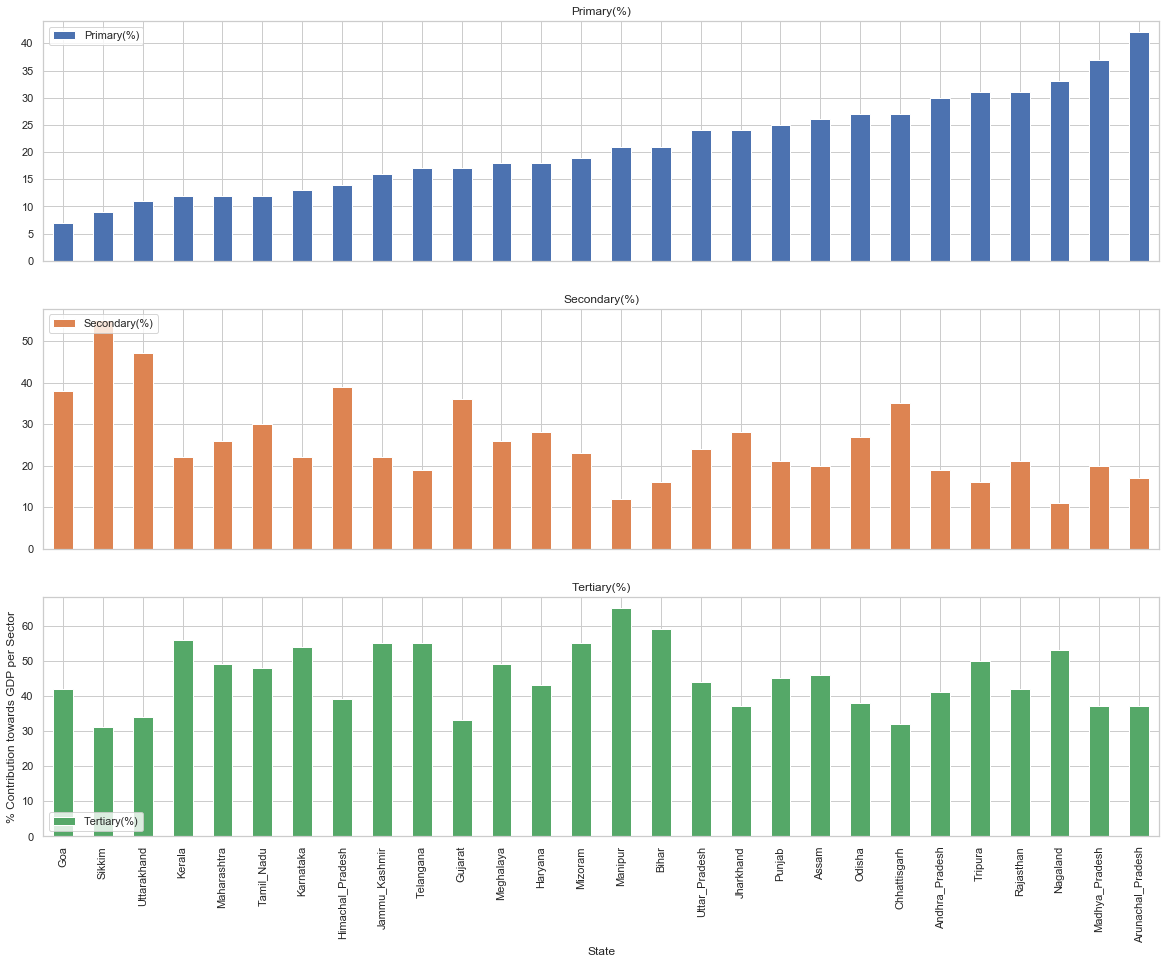

In [58]:
# Percentage Contribution in splitted fashion
axes = df_main_sec_stat.sort_values( by = [ 'Primary(%)', 'Secondary(%)', 'Tertiary(%)']).plot.bar( subplots=True, figsize = (20,15))
axes[1].legend(loc=2)  # doctest: +SKIP
axes[2].legend(loc=3)
plt.xlabel('State')
plt.ylabel('% Contribution towards GDP per Sector')
plt.show()

**Inference from Plot**
- On splitting the stacked bar on different sectors when we sorted the graph on all the sectors, we can see there are few states for which there is not 100% contribution is there and Tertiary has more contribution, then secondary and then comes primary 

#### Part I-B
5. Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.
     - Note: Categorisation into four groups will simplify the subsequent analysis, as otherwise, comparing the data of all the        states would become quite exhaustive.

In [59]:
#Prepare the data for the next analysis
df_per_capita = df_master_data_merge[df_master_data_merge['Item'] == 'Per Capita GSDP (Rs.)']
df_per_capita = df_per_capita.transpose()
df_per_capita.rename(columns = {32: 'Per Capita GSDP (Rs.)'}, inplace = True)
df_per_capita

,Per Capita GSDP (Rs.)
Item,Per Capita GSDP (Rs.)
Andhra_Pradesh,104977
Arunachal_Pradesh,112718
Assam,60621
Bihar,33954
Chhattisgarh,86860
Goa,271793
Gujarat,141263
Haryana,164077
Himachal_Pradesh,147330


In [60]:
#Get the quantile values for Per Capita GSDP
elements = df_per_capita['Per Capita GSDP (Rs.)'].values.tolist()
elements.pop(0)
#Get the value of 4quantiles ( This will be the starting value for each of the quartile)
q1 = np.quantile(elements, 0.20)
q2 = np.quantile(elements, 0.5)
q3 = np.quantile(elements, 0.85)
q4 = np.quantile(elements, 1 )
print("Quantile1: {0}, Quantile2: {1}, Quantile3: {2}, Quantile4: {3}".format(q1, q2, q3, q4))

Quantile1: 67385.0, Quantile2: 101332.0, Quantile3: 153064.85, Quantile4: 271793.0


In [61]:
# compute the category for each of the value
quantile_grp = []
quantile_grp.append('Category')
for elem in elements:
    if elem < q1:
        quantile_grp.append('C4')
    elif q1<= elem < q2:
        quantile_grp.append('C3')
    elif q2<= elem < q3:
        quantile_grp.append('C2')
    elif q3 <= elem <= q4:
        quantile_grp.append('C1')
print(quantile_grp)

['Category', 'C2', 'C2', 'C4', 'C4', 'C3', 'C1', 'C2', 'C1', 'C2', 'C3', 'C4', 'C2', 'C1', 'C4', 'C2', 'C4', 'C3', 'C3', 'C3', 'C3', 'C2', 'C3', 'C1', 'C2', 'C2', 'C3', 'C1', 'C4']


In [62]:
#Form the GSDP Category Column
df_per_capita['Category'] = quantile_grp
df_per_capita.drop('Per Capita GSDP (Rs.)', axis = 1, inplace = True)
df_per_capita

,Category
Item,Category
Andhra_Pradesh,C2
Arunachal_Pradesh,C2
Assam,C4
Bihar,C4
Chhattisgarh,C3
Goa,C1
Gujarat,C2
Haryana,C1
Himachal_Pradesh,C2


In [63]:
df_per_capita = df_per_capita.transpose()
df_per_capita

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
Category,Category,C2,C2,C4,C4,C3,C1,C2,C1,C2,...,C3,C3,C2,C3,C1,C2,C2,C3,C1,C4


In [64]:
# To concat and add the category with the original dataset
df_master_data_with_cat = pd.DataFrame()
df_temp = pd.DataFrame()
df_temp = df_master_data_merge
df_master_data_with_cat = pd.concat([df_temp, df_per_capita], ignore_index = True)
df_master_data_with_cat

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
0,"Agriculture, forestry and fishing",1.48194e+07,686117,3.85555e+06,7.95189e+06,3.94885e+06,308507,1.377e+07,8.01524e+06,1.51498e+06,...,607897,6.42298e+06,9.28572e+06,1.50444e+07,137447,1.30642e+07,7.5915e+06,799825,1.60142e+06,2.50978e+07
1,Crops,7.89351e+06,415520,2.89054e+06,4.68824e+06,2.61337e+06,140421,9.67109e+06,4.63673e+06,853758,...,375825,4.38264e+06,5.69097e+06,7.67344e+06,114976,7.29782e+06,4.16249e+06,397591,866146,1.62152e+07
2,Livestock,4.30908e+06,38387,173478,2.0603e+06,352208,30141,2.69891e+06,2.91617e+06,110304,...,123800,788243,2.63884e+06,5.35626e+06,17338,4.69336e+06,2.9513e+06,88176,391188,7.09688e+06
3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616,352254,540950,...,99802,791463,848245,1.95666e+06,4529,392705,210741,145096,339293,1.40494e+06
4,Fishing and aquaculture,2.27066e+06,8193,529539,653224,385483,122201,638357,110080,9968,...,8470,460636,107657,58036,604,680352,266968,168961,4796,380730
5,Mining and quarrying,1.4843e+06,30842,1.47115e+06,68107,2.45197e+06,3622,2.11722e+06,25186,33385,...,8280,2.58633e+06,10354,4.06938e+06,1329,265536,1.54185e+06,142391,244549,901501
6,Primary,1.63037e+07,716959,5.3267e+06,8.02e+06,6.40082e+06,312129,1.58872e+07,8.04042e+06,1.54837e+06,...,616178,9.00931e+06,9.29607e+06,1.91138e+07,138776,1.33298e+07,9.13335e+06,942216,1.84597e+06,2.59993e+07
7,Manufacturing,4.67227e+06,26120,2.00294e+06,2.18996e+06,4.37059e+06,1.17761e+06,2.40875e+07,7.75692e+06,2.54364e+06,...,18346,5.75423e+06,4.79034e+06,6.55258e+06,550697,1.89148e+07,6.35371e+06,228625,5.86625e+06,1.22616e+07
8,"Electricity, gas, water supply & other utility...",1.15173e+06,113527,296587,345168,1.19844e+06,204110,3.40998e+06,1.10192e+06,767268,...,37944,833067,911611,1.12289e+06,212499,1.71038e+06,716266,77870,433880,2.03062e+06
9,Construction,4.66489e+06,147842,1.73357e+06,3.44976e+06,2.66986e+06,165819,5.52602e+06,3.70257e+06,808256,...,156072,2.4024e+06,2.20296e+06,5.35333e+06,82058,1.22167e+07,2.85402e+06,177899,1.34273e+06,1.12564e+07


#### Plot I-B
6. For each category (C1, C2, C3, C4):
   - Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary,      secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

          -Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while            agriculture, manufacturing etc. are named 'sub-sectors'.
          -Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3              sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results                  consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis                needs to be sharp and concise.)
   - Plot the contribution of the sub-sectors as a percentage of the GSDP of each category. 

In [65]:
# To get the category of the state
df_per_capita = df_per_capita.transpose()
df_per_capita

,Category
Item,Category
Andhra_Pradesh,C2
Arunachal_Pradesh,C2
Assam,C4
Bihar,C4
Chhattisgarh,C3
Goa,C1
Gujarat,C2
Haryana,C1
Himachal_Pradesh,C2


In [66]:
# Get all the list of State that falls into the Category
c1_list = df_per_capita[df_per_capita['Category'] == 'C1'].index.tolist()
c2_list = df_per_capita[df_per_capita['Category'] == 'C2'].index.tolist()
c3_list = df_per_capita[df_per_capita['Category'] == 'C3'].index.tolist()
c4_list = df_per_capita[df_per_capita['Category'] == 'C4'].index.tolist()
print("C1 Category States are {0}".format(c1_list))
print("C2 Category States are {0}".format(c2_list))
print("C3 Category States are {0}".format(c3_list))
print("C4 Category States are {0}".format(c4_list))

C1 Category States are ['Goa', 'Haryana', 'Kerala', 'Sikkim', 'Uttarakhand']
C2 Category States are ['Andhra_Pradesh', 'Arunachal_Pradesh', 'Gujarat', 'Himachal_Pradesh', 'Karnataka', 'Maharashtra', 'Punjab', 'Tamil_Nadu', 'Telangana']
C3 Category States are ['Chhattisgarh', 'Jammu_Kashmir', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Rajasthan', 'Tripura']
C4 Category States are ['Assam', 'Bihar', 'Jharkhand', 'Madhya_Pradesh', 'Manipur', 'Uttar_Pradesh']


In [67]:
# Drop all the irrelevant rows like Primary, Seconday, Tertiary
df_master_data_with_cat.drop([6,10,26,27,28,29,31,32,33], inplace=True) # Drop the category column
df_master_data_with_cat[df_master_data_with_cat.columns.tolist()[1:]] = df_master_data_with_cat[df_master_data_with_cat.columns.tolist()[1:]].apply(pd.to_numeric) # convert to numeric column
df_master_data_with_cat.info() #Get the info of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 30
Data columns (total 29 columns):
Item                 25 non-null object
Andhra_Pradesh       25 non-null float64
Arunachal_Pradesh    25 non-null float64
Assam                25 non-null float64
Bihar                25 non-null float64
Chhattisgarh         25 non-null float64
Goa                  25 non-null float64
Gujarat              21 non-null float64
Haryana              23 non-null float64
Himachal_Pradesh     25 non-null float64
Jammu_Kashmir        25 non-null float64
Jharkhand            25 non-null float64
Karnataka            25 non-null float64
Kerala               25 non-null float64
Madhya_Pradesh       25 non-null float64
Maharashtra          25 non-null float64
Manipur              22 non-null float64
Meghalaya            23 non-null float64
Mizoram              25 non-null float64
Nagaland             25 non-null float64
Odisha               25 non-null float64
Punjab               25 non-null floa

In [68]:
# Get the C1 List states and also Item columms as it is required for plotting
c1_list[0] = 'Item'

In [69]:
# To get the list of all the items for trhe C1 Category State
df_data_c1_list = df_master_data_with_cat[c1_list]
df_data_c1_list = df_data_c1_list.fillna(0)
df_data_c1_list #Replace the NaN values with 0

,Item,Haryana,Kerala,Sikkim,Uttarakhand
0,"Agriculture, forestry and fishing",8015238.0,5930617.0,137447.0,1601423.0
1,Crops,4636731.0,3070386.0,114976.0,866146.0
2,Livestock,2916173.0,1656104.0,17338.0,391188.0
3,Forestry and logging,352254.0,499808.0,4529.0,339293.0
4,Fishing and aquaculture,110080.0,704319.0,604.0,4796.0
5,Mining and quarrying,25186.0,558824.0,1329.0,244549.0
7,Manufacturing,7756921.0,4273567.0,550697.0,5866252.0
8,"Electricity, gas, water supply & other utility...",1101919.0,482470.0,212499.0,433880.0
9,Construction,3702571.0,7314003.0,82058.0,1342733.0
11,"Trade, repair, hotels and restaurants",4986319.0,8557345.0,70568.0,1743106.0


In [70]:
# To do the sum across all the columns
df_data_c1_list['% Contri per Sub Sector'] = df_data_c1_list.sum(axis = 1)
df_data_c1_list.head()

,Item,Haryana,Kerala,Sikkim,Uttarakhand,% Contri per Sub Sector
0,"Agriculture, forestry and fishing",8015238.0,5930617.0,137447.0,1601423.0,15684725.0
1,Crops,4636731.0,3070386.0,114976.0,866146.0,8688239.0
2,Livestock,2916173.0,1656104.0,17338.0,391188.0,4980803.0
3,Forestry and logging,352254.0,499808.0,4529.0,339293.0,1195884.0
4,Fishing and aquaculture,110080.0,704319.0,604.0,4796.0,819799.0


In [71]:
# to find the contribution per subsector across All the states
df_data_c1_list['% Contri per Sub Sector'] = round((df_data_c1_list['% Contri per Sub Sector'] / df_data_c1_list[df_data_c1_list['Item'] == 'Gross State Domestic Product' ]['% Contri per Sub Sector'].values.tolist()[0]) * 100, 0)
df_data_c1_list.sort_values(by = '% Contri per Sub Sector', ascending = False, inplace= True )
df_data_c1_list

,Item,Haryana,Kerala,Sikkim,Uttarakhand,% Contri per Sub Sector
30,Gross State Domestic Product,43746207.0,52600230.0,1520933.0,16198529.0,100.0
7,Manufacturing,7756921.0,4273567.0,550697.0,5866252.0,16.0
0,"Agriculture, forestry and fishing",8015238.0,5930617.0,137447.0,1601423.0,14.0
23,"Real estate, ownership of dwelling & professio...",6970183.0,7287633.0,75330.0,831307.0,13.0
11,"Trade, repair, hotels and restaurants",4986319.0,8557345.0,70568.0,1743106.0,13.0
12,Trade & repair services,4817784.0,7763847.0,64624.0,1534073.0,12.0
9,Construction,3702571.0,7314003.0,82058.0,1342733.0,11.0
1,Crops,4636731.0,3070386.0,114976.0,866146.0,8.0
25,Other services,2001581.0,5728645.0,149265.0,982430.0,8.0
14,"Transport, storage, communication & services r...",2560623.0,4020934.0,47347.0,1066693.0,7.0


In [72]:
df_data_c1_list = df_data_c1_list.iloc[1:] # Removing the first element as that comprise of total GSDP

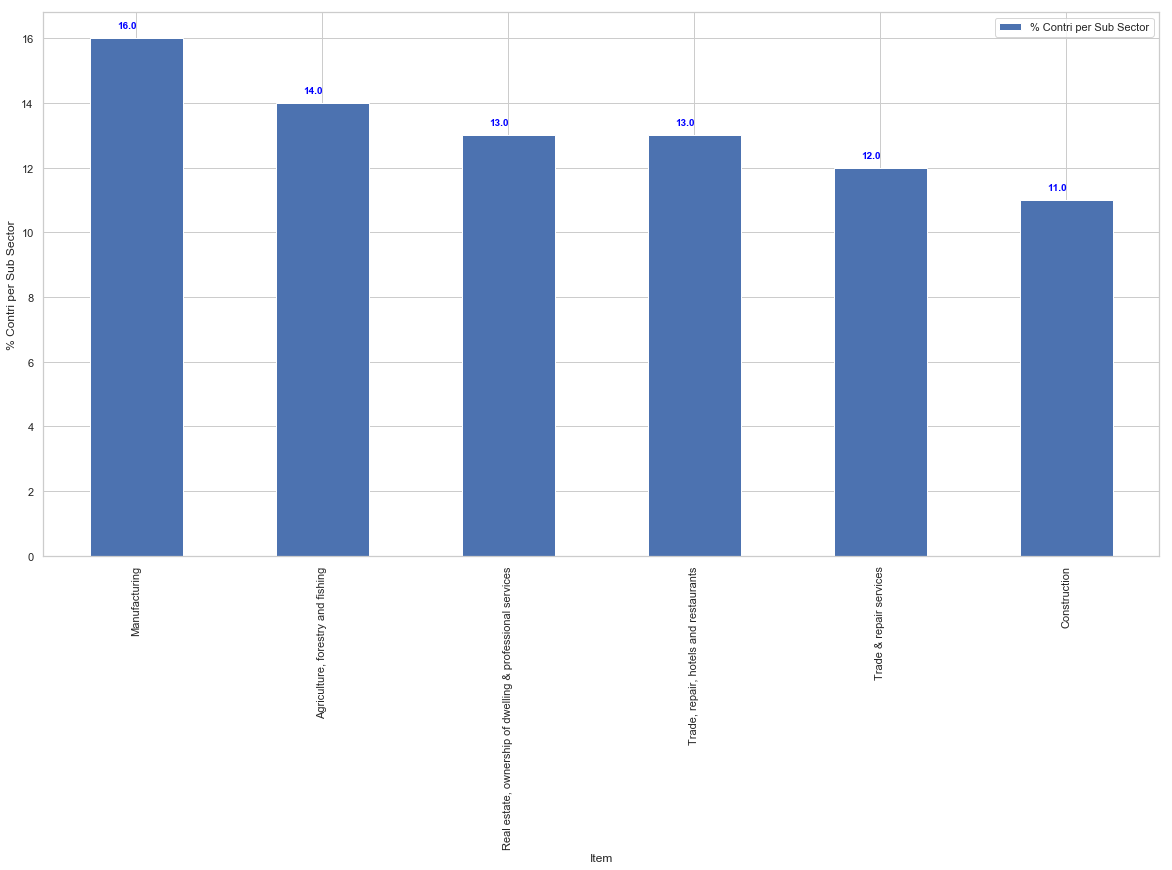

In [73]:
# Get the C1 category state whose cummulative contribution contributes to 80%
df_sub_cat_c1 = df_data_c1_list[ df_data_c1_list['% Contri per Sub Sector'].cumsum() <= 80.0 ]
df_sub_cat = df_sub_cat_c1.set_index('Item')
ax = df_sub_cat[['% Contri per Sub Sector']].plot.bar(figsize = (20,10))
ax.set_ylabel("% Contri per Sub Sector")
for i,v in enumerate(df_sub_cat['% Contri per Sub Sector'].values.tolist()):
    ax.text(i - 0.1, v + 0.3, str(v), color='blue', fontweight='bold')
plt.show()

For the C1 States 'Goa', 'Haryana', 'Kerala', 'Sikkim', 'Uttarakhand' the observation that can be drawn, the subsector which contribute to approx 80% 
   - Manufacturing
   - Agriculture, forestry and fishing
   - Real estate, ownership of dwelling & professional services
   - Trade & repair services
   - Construction

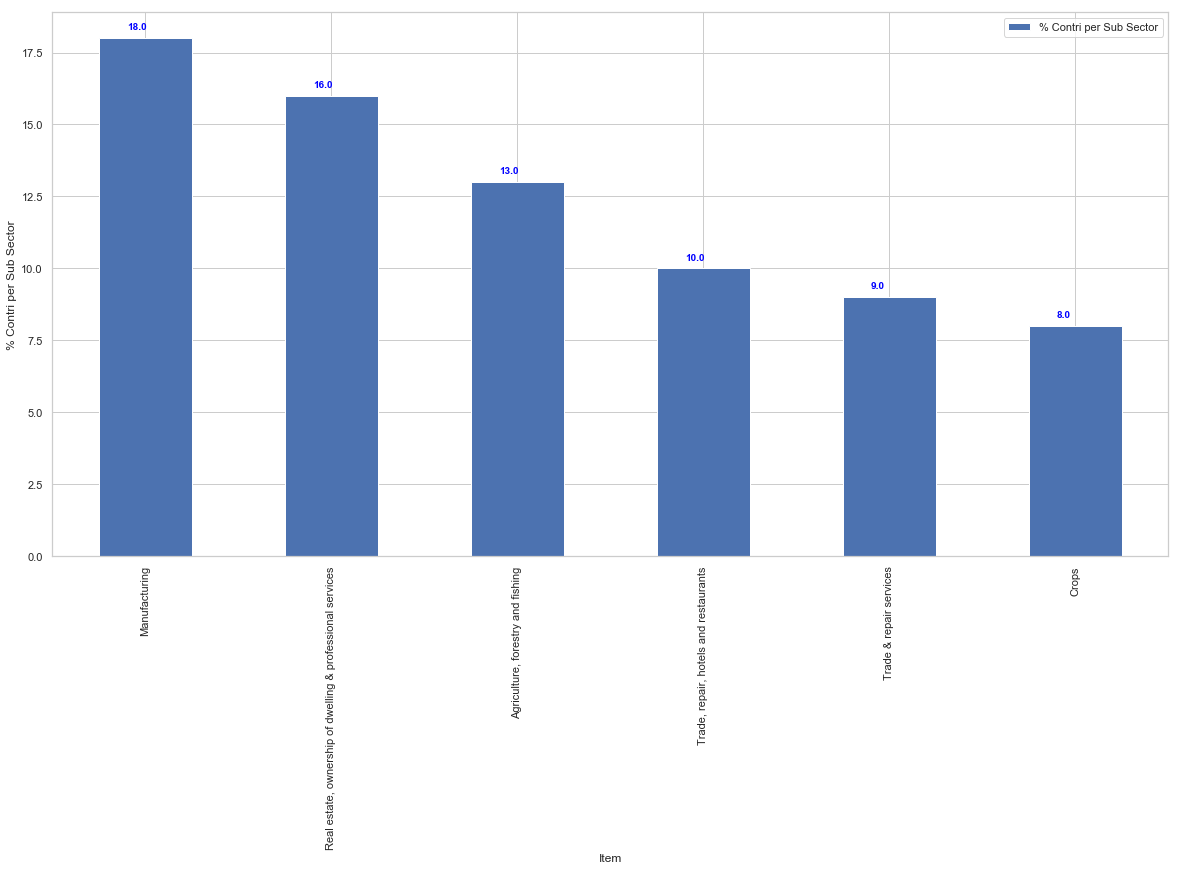

In [74]:
# Get the C2 List states and also Item columms as it is required for plotting
c2_list[0] = 'Item'
# To get the list of all the items for trhe C2 Category State
df_data_c2_list = df_master_data_with_cat[c2_list]
df_data_c2_list = df_data_c2_list.fillna(0)
# To do the sum across all the columns
df_data_c2_list['% Contri per Sub Sector'] = df_data_c2_list.sum(axis = 1)
# to find the contribution per subsector across All the states
df_data_c2_list['% Contri per Sub Sector'] = round((df_data_c2_list['% Contri per Sub Sector'] / df_data_c2_list[df_data_c2_list['Item'] == 'Gross State Domestic Product' ]['% Contri per Sub Sector'].values.tolist()[0]) * 100, 0)
df_data_c2_list.sort_values(by = '% Contri per Sub Sector', ascending = False, inplace= True )
df_data_c2_list = df_data_c2_list.iloc[1:] # Removing the first element as that comprise of Item GSDP that's needs to be removed
df_sub_cat_c2 = df_data_c2_list[ df_data_c2_list['% Contri per Sub Sector'].cumsum() <= 80.0 ]
df_sub_cat = df_sub_cat_c2.set_index('Item')
ax = df_sub_cat[['% Contri per Sub Sector']].plot.bar(figsize = (20,10))
ax.set_ylabel("% Contri per Sub Sector")
for i,v in enumerate(df_sub_cat['% Contri per Sub Sector'].values.tolist()):
    ax.text(i - 0.1, v + 0.3, str(v), color='blue', fontweight='bold')
plt.show()

For the C2 States 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Gujarat', 'Himachal_Pradesh', 'Karnataka', 'Maharashtra', 'Punjab', 'Tamil_Nadu', 'Telangana' the observation that can be drawn, the subsector which contribute to approx 80% 
   - Manufacturing
   - Real estate, ownership of dwelling & professional services
   - Agriculture, forestry and fishing
   - Trade, repair, hotels and restaurants
   - Trade & repair services
   - Crops

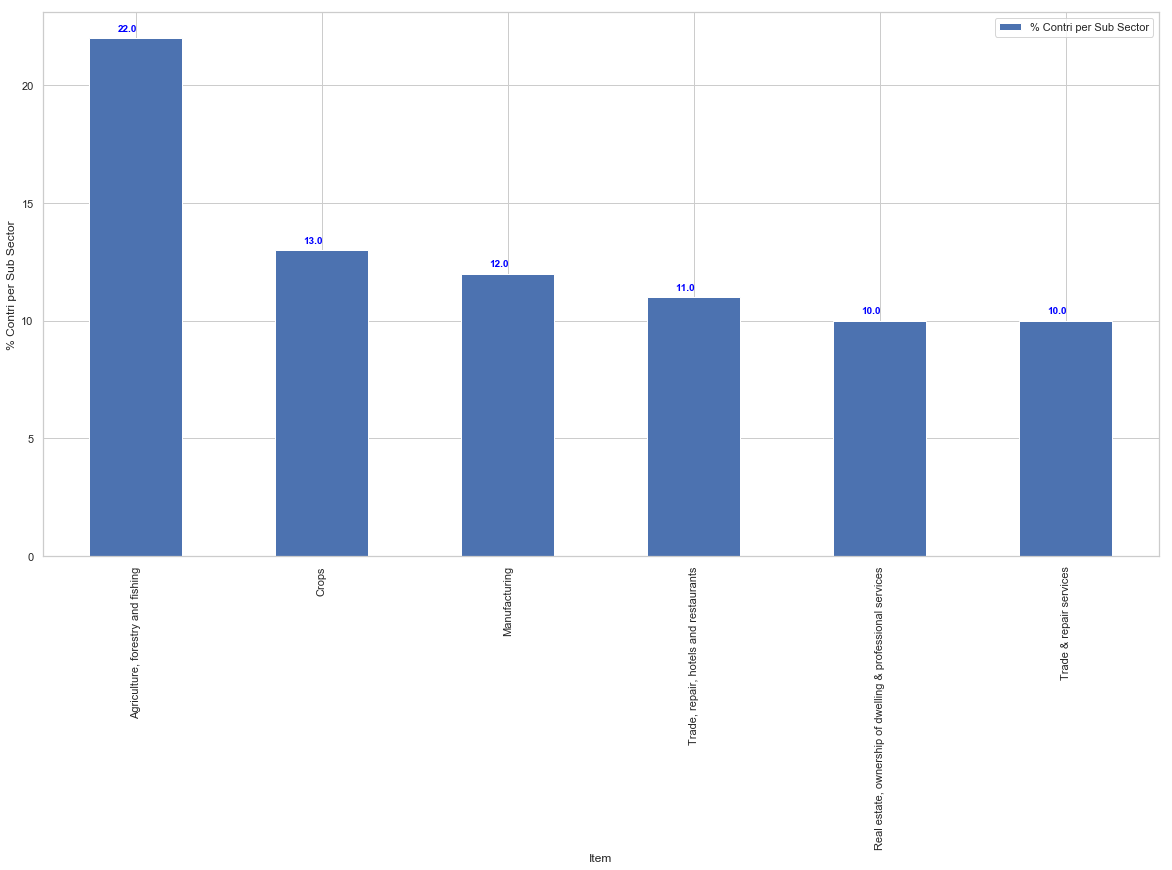

In [75]:
# Get the C3 List states and also Item columms as it is required for plotting
c3_list[0] = 'Item'
# To get the list of all the items for trhe C3 Category State
df_data_c3_list = df_master_data_with_cat[c3_list]
df_data_c3_list = df_data_c3_list.fillna(0)
# To do the sum across all the columns
df_data_c3_list['% Contri per Sub Sector'] = df_data_c3_list.sum(axis = 1)
# to find the contribution per subsector across All the states
df_data_c3_list['% Contri per Sub Sector'] = round((df_data_c3_list['% Contri per Sub Sector'] / df_data_c3_list[df_data_c3_list['Item'] == 'Gross State Domestic Product' ]['% Contri per Sub Sector'].values.tolist()[0]) * 100, 0)
df_data_c3_list.sort_values(by = '% Contri per Sub Sector', ascending = False, inplace= True )
df_data_c3_list = df_data_c3_list.iloc[1:] # Removing the first element as that comprise of Item GSDP that's needs to be removed
df_sub_cat_c3 = df_data_c3_list[ df_data_c3_list['% Contri per Sub Sector'].cumsum() <= 80.0 ]
df_sub_cat = df_sub_cat_c3.set_index('Item')
ax = df_sub_cat[['% Contri per Sub Sector']].plot.bar(figsize = (20,10))
ax.set_ylabel("% Contri per Sub Sector")
for i,v in enumerate(df_sub_cat['% Contri per Sub Sector'].values.tolist()):
    ax.text(i - 0.1, v + 0.3, str(v), color='blue', fontweight='bold')
plt.show()

For the C3 States 'Chhattisgarh', 'Jammu_Kashmir', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Rajasthan', 'Tripura' the observation that can be drawn, the subsector which contribute to approx 80% 
   - Agriculture, forestry and fishing
   - Crops
   - Manufacturing
   - Trade, repair, hotels and restaurants
   - Real estate, ownership of dwelling & professional services
   - Trade & repair services

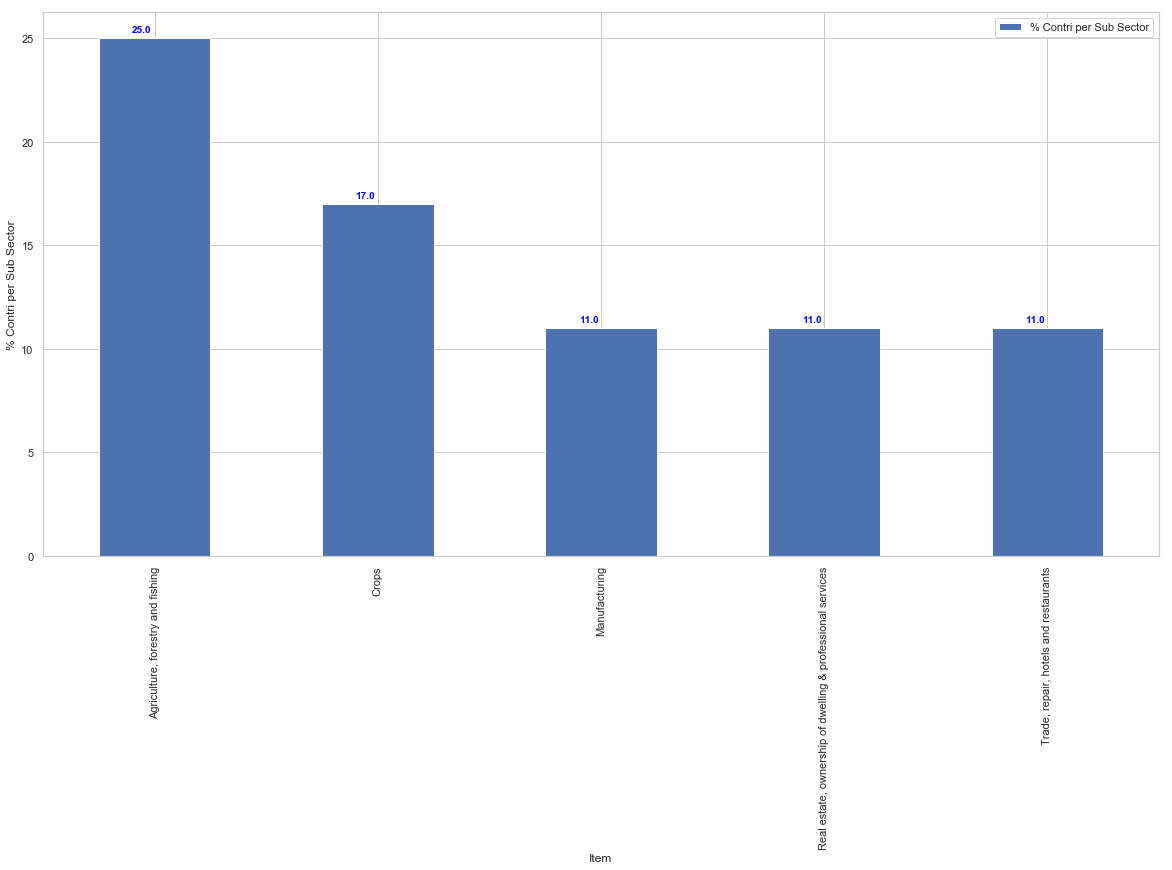

In [76]:
# Get the C4 List states and also Item columms as it is required for plotting
c4_list[0] = 'Item'
# To get the list of all the items for trhe C4 Category State
df_data_c4_list = df_master_data_with_cat[c4_list]
df_data_c4_list = df_data_c4_list.fillna(0)
# To do the sum across all the columns
df_data_c4_list['% Contri per Sub Sector'] = df_data_c4_list.sum(axis = 1)
# to find the contribution per subsector across All the states
df_data_c4_list['% Contri per Sub Sector'] = round((df_data_c4_list['% Contri per Sub Sector'] / df_data_c4_list[df_data_c4_list['Item'] == 'Gross State Domestic Product' ]['% Contri per Sub Sector'].values.tolist()[0]) * 100, 0)
df_data_c4_list.sort_values(by = '% Contri per Sub Sector', ascending = False, inplace= True )
df_data_c4_list = df_data_c4_list.iloc[1:] # Removing the first element as that comprise of Item GSDP that's needs to be removed
df_sub_cat_c4 = df_data_c4_list[ df_data_c4_list['% Contri per Sub Sector'].cumsum() <= 80.0 ]
df_sub_cat = df_sub_cat_c4.set_index('Item')
ax = df_sub_cat[['% Contri per Sub Sector']].plot.bar(figsize = (20,10))
ax.set_ylabel("% Contri per Sub Sector")
for i,v in enumerate(df_sub_cat['% Contri per Sub Sector'].values.tolist()):
    ax.text(i - 0.1, v + 0.3, str(v), color='blue', fontweight='bold')
plt.show()

For the C4 States 'Assam', 'Bihar', 'Jharkhand', 'Madhya_Pradesh', 'Manipur', 'Uttar_Pradesh' the observation that can be drawn, the subsector which contribute to approx 80% 
   - Agriculture, forestry and fishing
   - Crops
   - Manufacturing
   - Trade, repair, hotels and restaurants
   - Real estate, ownership of dwelling & professional services
   - Trade & repair services

**Plot I-B**
6.  Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:
 - How does the GDP distribution of the top states (C1) differ from the others?
 - Which sub-sectors seem to be correlated with high GDP?
 - Which sub-sectors do the various categories need to focus on? (The recommendation is required for both top-performing and low performing sectors for each category of states.)

Ask other such relevant questions, which you think are important, and note your insights for category separately.
Finally, provide at least two recommendations for each category to improve the per capita GDP.

 - Finally, provide at least two recommendations for each category to improve the per capita GDP.

In [77]:
# C1 State Top Sub Sector Contribution
list_dat = []
list_dat = df_sub_cat_c1.columns.to_list()
print(list_dat)
list_dat.remove('Item')
list_dat.remove('% Contri per Sub Sector')
df_temp_data = df_sub_cat_c1.copy()
df_temp_data['c1_Contri per Sub Sector'] = df_temp_data[list_dat].sum(axis = 1)
df_temp_data.drop(list_dat, axis = 1, inplace = True)
df_temp_data = df_temp_data.rename(columns = {'% Contri per Sub Sector' : 'c1 % Contri per Sub Sector'})
df_temp_data.sort_values(by = 'c1_Contri per Sub Sector', ascending = False)

['Item', 'Haryana', 'Kerala', 'Sikkim', 'Uttarakhand', '% Contri per Sub Sector']


,Item,c1 % Contri per Sub Sector,c1_Contri per Sub Sector
7,Manufacturing,16.0,18447437.0
0,"Agriculture, forestry and fishing",14.0,15684725.0
11,"Trade, repair, hotels and restaurants",13.0,15357338.0
23,"Real estate, ownership of dwelling & professio...",13.0,15164453.0
12,Trade & repair services,12.0,14180328.0
9,Construction,11.0,12441365.0


**Which sub-sectors do the various categories need to focus on?**
For C1 State:
1. Need to more focus on **Manufactoring** ( As it's a high contributor )
2. Need a little more upliftment for **Construction** subsector as this can be a potential contributor

In [78]:
# C2 State Top Sub Sector Contribution
list_dat = []
list_dat = df_sub_cat_c2.columns.to_list()
print(list_dat)
list_dat.remove('Item')
list_dat.remove('% Contri per Sub Sector')
df_temp_data_c2 = df_sub_cat_c2.copy()
df_temp_data_c2['c2_Contri per Sub Sector'] = df_temp_data_c2[list_dat].sum(axis = 1)
df_temp_data_c2.drop(list_dat, axis = 1, inplace = True)
df_temp_data_c2 = df_temp_data_c2.rename(columns = {'% Contri per Sub Sector' : 'c2 % Contri per Sub Sector'})
df_temp_data_c2.sort_values(by = 'c2_Contri per Sub Sector', ascending = False)

['Item', 'Arunachal_Pradesh', 'Gujarat', 'Himachal_Pradesh', 'Karnataka', 'Maharashtra', 'Punjab', 'Tamil_Nadu', 'Telangana', '% Contri per Sub Sector']


,Item,c2 % Contri per Sub Sector,c2_Contri per Sub Sector
7,Manufacturing,18.0,103330278.0
23,"Real estate, ownership of dwelling & professio...",16.0,91290139.0
0,"Agriculture, forestry and fishing",13.0,73607599.0
11,"Trade, repair, hotels and restaurants",10.0,59495756.0
12,Trade & repair services,9.0,53718261.0
1,Crops,8.0,46683949.0


**Which sub-sectors do the various categories need to focus on?**
For C2 State:
1. Need to more focus on **Manufactoring** ( As it's a high contributor )
2. Need a little more upliftment for **Crops** subsector as this can be a potential contributor

In [79]:
# C3 State Top Sub Sector Contribution
list_dat = []
list_dat = df_sub_cat_c3.columns.to_list()
print(list_dat)
list_dat.remove('Item')
list_dat.remove('% Contri per Sub Sector')
df_temp_data_c3 = df_sub_cat_c3.copy()
df_temp_data_c3['c3_Contri per Sub Sector'] = df_temp_data_c3[list_dat].sum(axis = 1)
df_temp_data_c3.drop(list_dat, axis = 1, inplace = True)
df_temp_data_c3 = df_temp_data_c3.rename(columns = {'% Contri per Sub Sector' : 'c3 % Contri per Sub Sector'})
df_temp_data_c3.sort_values(by = 'c3_Contri per Sub Sector', ascending = False)

['Item', 'Jammu_Kashmir', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Rajasthan', 'Tripura', '% Contri per Sub Sector']


,Item,c3 % Contri per Sub Sector,c3_Contri per Sub Sector
0,"Agriculture, forestry and fishing",22.0,25045330.0
1,Crops,13.0,14118856.0
7,Manufacturing,12.0,13888679.0
11,"Trade, repair, hotels and restaurants",11.0,12366269.0
12,Trade & repair services,10.0,11630737.0
23,"Real estate, ownership of dwelling & professio...",10.0,10696625.0


**Which sub-sectors do the various categories need to focus on?**
For C3 State:
1. Need to more focus on **Agriculture, forestry and fishing** ( As it's a high contributor )
2. Need a little more upliftment for **Real estate, ownership of dwelling & professional services** subsector as this can be a potential contributor

In [80]:
# C4 State Top Sub Sector Contribution
list_dat = []
list_dat = df_sub_cat_c4.columns.to_list()
print(list_dat)
list_dat.remove('Item')
list_dat.remove('% Contri per Sub Sector')
df_temp_data_c4 = df_sub_cat_c4.copy()
df_temp_data_c4['c4_Contri per Sub Sector'] = df_temp_data_c4[list_dat].sum(axis = 1)
df_temp_data_c4.drop(list_dat, axis = 1, inplace = True)
df_temp_data_c4 = df_temp_data_c4.rename(columns = {'% Contri per Sub Sector' : 'c4 % Contri per Sub Sector'})
df_temp_data_c4.sort_values(by = 'c4_Contri per Sub Sector', ascending = False)

['Item', 'Bihar', 'Jharkhand', 'Madhya_Pradesh', 'Manipur', 'Uttar_Pradesh', '% Contri per Sub Sector']


,Item,c4 % Contri per Sub Sector,c4_Contri per Sub Sector
0,"Agriculture, forestry and fishing",25.0,52879496.0
1,Crops,17.0,36440511.0
11,"Trade, repair, hotels and restaurants",11.0,24497440.0
7,Manufacturing,11.0,22984096.0
23,"Real estate, ownership of dwelling & professio...",11.0,22765068.0


**Which sub-sectors do the various categories need to focus on?**
For C4 State:
1. Need to more focus on **Agriculture, forestry and fishing** ( As it's a high contributor )
2. Need a little more upliftment for **Real estate, ownership of dwelling & professional services** subsector as this can be a potential contributor

In [81]:
# This is the collation of all the sub sectors which are top contributor in their different categories
df_sub_sector_master_data = pd.DataFrame()
df_sub_sector_master_data = df_temp_data
df_sub_sector_master_data = df_sub_sector_master_data.merge(df_temp_data_c2, how = 'outer', on = "Item")  
df_sub_sector_master_data = df_sub_sector_master_data.merge(df_temp_data_c3, how = 'outer', on = "Item")  
df_sub_sector_master_data = df_sub_sector_master_data.merge(df_temp_data_c4, how = 'outer', on = "Item")  
df_sub_sector_master_data

,Item,c1 % Contri per Sub Sector,c1_Contri per Sub Sector,c2 % Contri per Sub Sector,c2_Contri per Sub Sector,c3 % Contri per Sub Sector,c3_Contri per Sub Sector,c4 % Contri per Sub Sector,c4_Contri per Sub Sector
0,Manufacturing,16.0,18447437.0,18.0,103330278.0,12.0,13888679.0,11.0,22984096.0
1,"Agriculture, forestry and fishing",14.0,15684725.0,13.0,73607599.0,22.0,25045330.0,25.0,52879496.0
2,"Real estate, ownership of dwelling & professio...",13.0,15164453.0,16.0,91290139.0,10.0,10696625.0,11.0,22765068.0
3,"Trade, repair, hotels and restaurants",13.0,15357338.0,10.0,59495756.0,11.0,12366269.0,11.0,24497440.0
4,Trade & repair services,12.0,14180328.0,9.0,53718261.0,10.0,11630737.0,NaN,NaN
5,Construction,11.0,12441365.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Crops,NaN,NaN,8.0,46683949.0,13.0,14118856.0,17.0,36440511.0


In [82]:
# To check out the C1 Category Contribution differs from other category
df_sub_sector_master_data['delta_c1-c2'] = df_sub_sector_master_data['c1_Contri per Sub Sector' ].sub(df_sub_sector_master_data['c2_Contri per Sub Sector' ], fill_value = 0) 
df_sub_sector_master_data['delta_c1-c3'] = df_sub_sector_master_data['c1_Contri per Sub Sector' ].sub(df_sub_sector_master_data['c3_Contri per Sub Sector' ], fill_value = 0) 
df_sub_sector_master_data['delta_c1-c4'] = df_sub_sector_master_data['c1_Contri per Sub Sector' ].sub(df_sub_sector_master_data['c4_Contri per Sub Sector' ], fill_value = 0) 
df_sub_sector_master_data

,Item,c1 % Contri per Sub Sector,c1_Contri per Sub Sector,c2 % Contri per Sub Sector,c2_Contri per Sub Sector,c3 % Contri per Sub Sector,c3_Contri per Sub Sector,c4 % Contri per Sub Sector,c4_Contri per Sub Sector,delta_c1-c2,delta_c1-c3,delta_c1-c4
0,Manufacturing,16.0,18447437.0,18.0,103330278.0,12.0,13888679.0,11.0,22984096.0,-84882841.0,4558758.0,-4536659.0
1,"Agriculture, forestry and fishing",14.0,15684725.0,13.0,73607599.0,22.0,25045330.0,25.0,52879496.0,-57922874.0,-9360605.0,-37194771.0
2,"Real estate, ownership of dwelling & professio...",13.0,15164453.0,16.0,91290139.0,10.0,10696625.0,11.0,22765068.0,-76125686.0,4467828.0,-7600615.0
3,"Trade, repair, hotels and restaurants",13.0,15357338.0,10.0,59495756.0,11.0,12366269.0,11.0,24497440.0,-44138418.0,2991069.0,-9140102.0
4,Trade & repair services,12.0,14180328.0,9.0,53718261.0,10.0,11630737.0,NaN,NaN,-39537933.0,2549591.0,14180328.0
5,Construction,11.0,12441365.0,NaN,NaN,NaN,NaN,NaN,NaN,12441365.0,12441365.0,12441365.0
6,Crops,NaN,NaN,8.0,46683949.0,13.0,14118856.0,17.0,36440511.0,-46683949.0,-14118856.0,-36440511.0


**How does the GDP distribution of the top states (C1) differ from the others?**
- When  we compared C1 State Contribution with C2 State Contribution
    - **Constructions** seems to be only positive one as you can see in delta c1-c2, for all other subsector, C2 category states have more contribution, for some of the subsectors
    - Then order is **Trade & repair services**, **Trade, repair, hotels and restaurants**, **Agriculture, forestry and fishing**, **Real estate, ownership of dwelling & professional services**, **Manufacturing** for C1 States these subsectors high GDP Contributor after Constructions but for C2 States this order is a reverse
- When  we compared C1 State Contribution with C3 State Contribution
    - **Construction**, **Manufacturing**, **Real estate, ownership of dwelling & professional services**, **Trade, repair, hotels and restaurants**, **Trade & repair services** these subsectors are high contributor for C1 state compared to C3 State. For C3 State **Agriculture, forestry and fishing**, **Crops** subsectors are high contributor.
- When  we compared C1 State Contribution with C4 State Contribution
    - **Construction**, **Trade & repair services** are the highest contributor for C1 state compared to C4 and for C4 States, the highest contributor are **Manufatuting**, **Real estate, ownership of dwelling & professional services**, **Trade, repair, hotels and restaurants**, **Crops**, **Agriculture, forestry and fishing**

In [83]:
df_sub_sector_master_data['Sum Across Sectors'] = df_sub_sector_master_data[['Item','c1_Contri per Sub Sector', 'c2_Contri per Sub Sector', 'c3_Contri per Sub Sector', 'c4_Contri per Sub Sector']].sum(axis = 1)
df_sub_sector_master_data.sort_values(by = 'Sum Across Sectors', ascending = False)

,Item,c1 % Contri per Sub Sector,c1_Contri per Sub Sector,c2 % Contri per Sub Sector,c2_Contri per Sub Sector,c3 % Contri per Sub Sector,c3_Contri per Sub Sector,c4 % Contri per Sub Sector,c4_Contri per Sub Sector,delta_c1-c2,delta_c1-c3,delta_c1-c4,Sum Across Sectors
1,"Agriculture, forestry and fishing",14.0,15684725.0,13.0,73607599.0,22.0,25045330.0,25.0,52879496.0,-57922874.0,-9360605.0,-37194771.0,167217150.0
0,Manufacturing,16.0,18447437.0,18.0,103330278.0,12.0,13888679.0,11.0,22984096.0,-84882841.0,4558758.0,-4536659.0,158650490.0
2,"Real estate, ownership of dwelling & professio...",13.0,15164453.0,16.0,91290139.0,10.0,10696625.0,11.0,22765068.0,-76125686.0,4467828.0,-7600615.0,139916285.0
3,"Trade, repair, hotels and restaurants",13.0,15357338.0,10.0,59495756.0,11.0,12366269.0,11.0,24497440.0,-44138418.0,2991069.0,-9140102.0,111716803.0
6,Crops,NaN,NaN,8.0,46683949.0,13.0,14118856.0,17.0,36440511.0,-46683949.0,-14118856.0,-36440511.0,97243316.0
4,Trade & repair services,12.0,14180328.0,9.0,53718261.0,10.0,11630737.0,NaN,NaN,-39537933.0,2549591.0,14180328.0,79529326.0
5,Construction,11.0,12441365.0,NaN,NaN,NaN,NaN,NaN,NaN,12441365.0,12441365.0,12441365.0,12441365.0


**Which sub-sectors seem to be correlated with high GDP?**
- As we can see from the above output, the top 7 Subsectors which contribute to highest GDP are ( in Descending Order )
    - Agriculture, forestry and fishing
    - Manufacturing
    - Real estate, ownership of dwelling & professional services
    - Trade, repair, hotels and restaurants
    - Crops
    - Trade & repair services
    - Construction

**Final Insights which can be drawn from the sub-sectors**
1. **Manufactoring** : This sub sector is a high contributor for C1 and C2 sub-sector
2. **Agriculture, forestry and fishing**: This sub-sector is a substantial contributor or a very important one, for each of the categories ( For category c1 and c2 it's one of the high contributor and for c3 and c4 it's the highest contributor
3. **Trade, repair, hotels and restaurants** : This sub-sector also is among the top three contributor for each of the category
4. **Trade & repair services** : It's also an sub-sector to focus on because their contribution is (12%, 9% and 10% ) for c1, c2 and c3 category state
5. **Real estate, ownership of dwelling & professional services** : this is one of the top two contributor for c2 category state and for c1 state it's among the top contributor (13%) contribution towards GDP, so for c1 and c2 category this sub-sector can also be focused upon
6. **Crops** : This subsector is the second highest contributor towards GDP for c3 and c4 category states, and for C2 category states this subsector contributes (8%) so for c2 states it needs some upliftment.
7. **Construction**: This is contributing around (11%) towards GDP for C1 category State, so for this is also one of the key ingredient for c1 category state to have more GDP 

So a conclusion is being made, as we can see only sub-sector Agriculture, forestry and fishing & Crops are from primary sector, rest all are from Secondary and Tertiary sector.

=====================================================================================================================

                                   **END OF PART I-B Analysis**
                                   
=====================================================================================================================          

**Part-II**
1. This section will require the dropout rate dataset apart from the dataset that you used in Part-1 of the case study.

In [84]:
# Fetch the dataset
df_drop_out_rate = pd.read_csv('Data_II.csv', index_col = 0)
df_drop_out_rate.head()

,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
Sl. No.,,,,,,,,,,,,,
1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


2. Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.

In [85]:
# As we can see above the 2014-2015 for primary is repeated twice, and as per the patern 2012-2013, 2013-2014, 2014-2015
# so we need to rename first column from primary 2014-2015 to 2013-2014 and 2014-2015.1 to 2014-2015
df_drop_out_rate = df_drop_out_rate.rename( columns = {'Primary - 2014-2015': 'Primary - 2013-2014', 'Primary - 2014-2015.1' : 'Primary - 2014-2015'})
df_drop_out_rate.columns

Index(['Level of Education - State', 'Primary - 2012-2013',
       'Primary - 2013-2014', 'Primary - 2014-2015',
       'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014',
       'Upper Primary - 2014-2015', 'Secondary - 2012-2013',
       'Secondary - 2013-2014', 'Secondary - 2014-2015',
       'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014',
       'Senior Secondary - 2014-2015'],
      dtype='object')

In [86]:
# Gets the columns list to drop
cols_to_drop = list(set(df_drop_out_rate.columns) - set(['Level of Education - State','Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015', 'Senior Secondary - 2014-2015']))
df_drop_out_rate.drop(cols_to_drop, axis = 1, inplace = True)
df_drop_out_rate.head()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
Sl. No.,,,,,
1,A & N Islands,0.51,1.69,9.87,16.93
2,Andhra Pradesh,6.72,5.20,15.71,NaN
3,Arunachal Pradesh,10.82,6.71,17.11,18.42
4,Assam,15.36,10.51,27.06,NaN
5,Bihar,NaN,4.08,25.90,NaN


In [87]:
# As we can see on top there are Union Terittories we need to drop all of those rows
df_drop_out_rate['Level of Education - State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhatisgarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttrakhand',
       'West Bengal', 'All India'], dtype=object)

In [88]:
#Part I-B data Columns
df_master_data_merge.columns

Index(['Item', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura',
       'Uttarakhand', 'Uttar_Pradesh'],
      dtype='object')

In [89]:
#Form the list and drop all those state
state_to_drop = ['A & N Islands', 'Chandigarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry', 'West Bengal', 'All India' ]
df_drop_out_rate.drop(df_drop_out_rate[df_drop_out_rate['Level of Education - State'].isin(state_to_drop)].index, inplace = True)
df_drop_out_rate['Level of Education - State'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhatisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttrakhand'], dtype=object)

In [90]:
# As it can be seen on top there are some states whose names are different compared to Part-I data-set
col_to_rename = { 'Andhra Pradesh': 'Andhra_Pradesh',
                  'Chhatisgarh': 'Chhattisgarh',
                  'Arunachal Pradesh': 'Arunachal_Pradesh',
                  'Himachal Pradesh': 'Himachal_Pradesh',
                  'Jammu and Kashmir': 'Jammu_Kashmir',
                  'Madhya Pradesh': 'Madhya_Pradesh',
                  'Tamil Nadu': 'Tamil_Nadu',
                  'Uttar Pradesh': 'Uttar_Pradesh', 
                  'Uttrakhand': 'Uttarakhand'
                }
df_drop_out_rate = df_drop_out_rate.T
df_drop_out_rate.columns = df_drop_out_rate.iloc[0]
df_drop_out_rate.drop('Level of Education - State', inplace = True)
df_drop_out_rate = df_drop_out_rate.rename(columns = col_to_rename )
df_drop_out_rate

Level of Education - State,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,Jammu_Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttar_Pradesh,Uttarakhand
Primary - 2014-2015,6.72,10.82,15.36,NaN,2.91,0.73,0.89,5.61,0.64,6.79,...,5.61,2.86,3.05,5.02,2.27,NaN,2.08,1.28,8.58,4.04
Upper Primary - 2014-2015,5.2,6.71,10.51,4.08,5.85,0.07,6.41,5.81,0.87,5.44,...,7.92,3.81,3.22,3.07,1.57,NaN,2.3,1.99,2.7,1.19
Secondary - 2014-2015,15.71,17.11,27.06,25.9,21.26,11.15,25.04,15.89,6.07,17.28,...,18.23,29.56,8.86,13.48,15.89,8.1,15.53,28.42,10.22,10.4
Senior Secondary - 2014-2015,NaN,18.42,NaN,NaN,2.76,13.91,7.04,5.75,7.41,12.65,...,6.97,NaN,5.83,NaN,11.76,3.41,0.77,8.93,2.1,3.01


In [92]:
#Form the data for processing
df_drop_out_rate = df_drop_out_rate.T
df_per_capita = df_master_data_merge[df_master_data_merge['Item'] == 'Per Capita GSDP (Rs.)' ].T
df_per_capita.rename(index={'Item':'Level of Education - State'},inplace=True)
df_per_capita.columns =  df_per_capita.iloc[0]
df_per_capita = df_per_capita.iloc[1:]
df_per_capita

Level of Education - State,Per Capita GSDP (Rs.)
Andhra_Pradesh,104977
Arunachal_Pradesh,112718
Assam,60621
Bihar,33954
Chhattisgarh,86860
Goa,271793
Gujarat,141263
Haryana,164077
Himachal_Pradesh,147330
Jammu_Kashmir,75840


In [93]:
#Form the final dataset to do analysis for drop out rates
df_final_data = pd.concat([df_per_capita,df_drop_out_rate], axis = 1)
df_final_data

C:\Users\I327559\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Per Capita GSDP (Rs.),Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
Andhra_Pradesh,104977,6.72,5.2,15.71,NaN
Arunachal_Pradesh,112718,10.82,6.71,17.11,18.42
Assam,60621,15.36,10.51,27.06,NaN
Bihar,33954,NaN,4.08,25.9,NaN
Chhattisgarh,86860,2.91,5.85,21.26,2.76
Goa,271793,0.73,0.07,11.15,13.91
Gujarat,141263,0.89,6.41,25.04,7.04
Haryana,164077,5.61,5.81,15.89,5.75
Himachal_Pradesh,147330,0.64,0.87,6.07,7.41
Jammu_Kashmir,75840,6.79,5.44,17.28,12.65


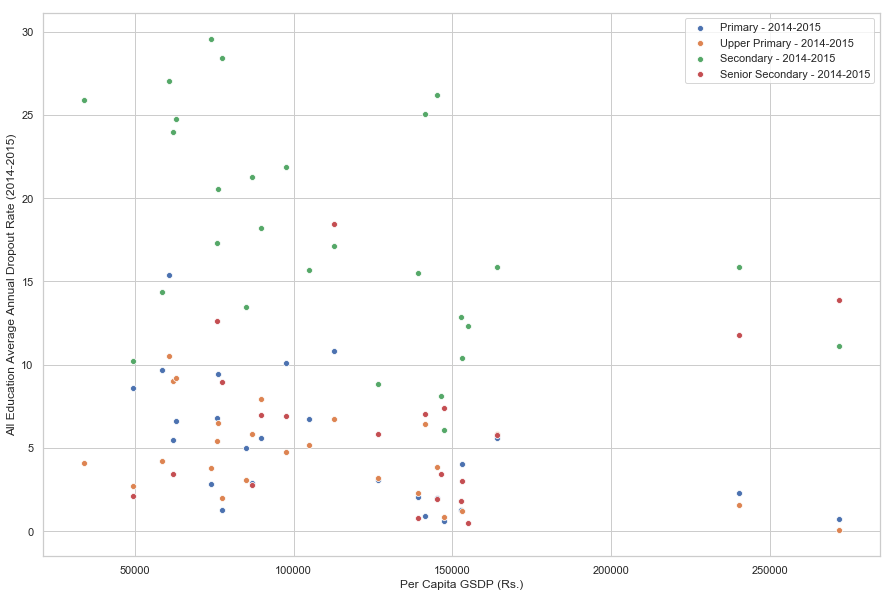

In [94]:
#plot the scatter plot between different edcuation and per capita GDP
sns.set(style="ticks", color_codes=True)
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))

sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Primary - 2014-2015', data = df_final_data)
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Upper Primary - 2014-2015', data = df_final_data)
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Secondary - 2014-2015', data = df_final_data)
sns.scatterplot(x = 'Per Capita GSDP (Rs.)',y = 'Senior Secondary - 2014-2015', data = df_final_data)
plt.ylabel('All Education Average Annual Dropout Rate (2014-2015)')
plt.legend(['Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015', 'Senior Secondary - 2014-2015'])
plt.show()

**Conclusions Drawn from the Above Plots**

There are few inferences can be drawn from the figure
- If you see the below plot, most of the points are clustered together, marked inside the circle
- In this cluster, points from different education system are there.
- What we can see below, is for low GDP there is more Dropouts for high GDP there is less drop outs
![Scatter Plot](img/scatter.jpg)